In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import  seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [135]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import  SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xg
from sklearn.model_selection import  train_test_split,GridSearchCV


In [97]:
from sklearn.preprocessing import  LabelEncoder, Normalizer , StandardScaler

from sklearn.metrics import accuracy_score,mean_squared_error,r2_score

### Problem
Drinking has been proven to negatively affect health in a multiple ways.
1. Smoking has been found to harm nearly every organ of the body.
2. It is a cause of many diseases.
3. Reduces the life expectancy.
4. In 2018, smoking had been considered the leading cause of preventable morbidity and mortality in the world.


### How a prediction model can help to solve this problem?

Providing a prediction model might be a favourable in a  way to understand the chance of quitting smoking for each individual smoker

# EDA

In [98]:
df = pd.read_csv('data/smoking.csv')

In [99]:
## For testing the model take a small subset of the dataset( Do not forget to comment it down)
df = df.iloc[:9000,:]

In [100]:
len(df)

9000

In [101]:
df.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0      21.0      35.0       40.0               1.0       Y  
1               0.9      20.0      36.0       27.0               3.0       N  
2               0.9      47.0      32.0       68.0               1.0       N  
3               1.1      29.0      34.0       18.0               1.0       N  
4               0.8      19.0      12.0       25.0               1.0       N  

[5 rows x 24 columns]

### Understanding of columns

1. sex- gener of the person
2. age - Its age in years
3. Height - Height in cm
4. Weight - Weight in kg
5. waistline - Waist circumference length
6. sight_left - eyesight of left eye
7. sight_right - eyesight of right eye
8. hear_left - hearing of left ear
9. hear_right - hearing of right ear
10. SBP - systolic Blood Pressure (Force produced buy heart when it pumps blood out the body
11. DBP - Diastolic Blood Pressure(Pressure in blood vessels when the heart is at rest)
12. BLDS
13. tot_chole - Total Cholesterol 
14. HDL_chole - High density Lipoprotein (Good cholesterol)(+)
15. LDL_chose - Low density Lipoprotein (Bad cholesterol)(-)
16. triglyceride - Triglycerides are a type of fat. They are the most common type of fat in your body. They come from foods, especially butter, oils, and other fats you eat. (+ or -)
17. Hemoglobin - Protein in red blood cells carries oxygen to body's organs(+)
18. Urine_protein - Protein in urine
19. serum_creatinine -  creatinine level 
20. SGOT_AST - Serum glutamic-oxaloacetic transaminase(Aspartate transaminase)
21. SGOT_ALT - "" ""  (Alanine transaminase)
These above two enzymes AST and ALT found inliver cells that leak out of cells and mix in  blood when liver cells get injured
22. gamma_GTP - y-glutamyl transpepetidase (Test is used to detect diseases of the liver  or bile ducts. This is similar tests like ALT, AST, ALP)
23. Smoking state,- 
* 1 - never
* 2 - used to smoke but quit
* 3 - still smoke
24. DRK_YN  - Drinker or Not - (Output)
* 1 - drink
* 0 - does not drink

In [102]:
df.head()

sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0               1.0      21.0      35.0       40.0               1.0       Y  
1               0.9      20.0      36.0       27.0               3.0       N  
2               0.9      47.0      32.0       68.0               1.0       N  
3               1.1      29.0      34.0       18.0               1.0       N  
4               0.8      19.0      12.0       25.0               1.0       N  

[5 rows x 24 columns]

### Things to be done in EDA
check Missing values
Check duplicates
Check data type
Check the number of unique values of each column
Check Statistics of data set
Check various categories present in the different categorical column

In [103]:
dataset_length_before_removing_dulicates = len(df)

In [104]:
df.isnull().sum().sum()

0

* Zero missing values in dataset

In [105]:
df[df.duplicated()]

Empty DataFrame
Columns: [sex, age, height, weight, waistline, sight_left, sight_right, hear_left, hear_right, SBP, DBP, BLDS, tot_chole, HDL_chole, LDL_chole, triglyceride, hemoglobin, urine_protein, serum_creatinine, SGOT_AST, SGOT_ALT, gamma_GTP, SMK_stat_type_cd, DRK_YN]
Index: []

[0 rows x 24 columns]

* Total 26 dulicates rows present in dataset

In [106]:
df.drop_duplicates(inplace=True)

In [107]:
data_length_after_removing_duplicates = len(df)

In [108]:
print('Old data length {}'.format(dataset_length_before_removing_dulicates))
print('New data length {}'.format(data_length_after_removing_duplicates))

Old data length 9000
New data length 9000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sex               9000 non-null   object 
 1   age               9000 non-null   int64  
 2   height            9000 non-null   int64  
 3   weight            9000 non-null   int64  
 4   waistline         9000 non-null   float64
 5   sight_left        9000 non-null   float64
 6   sight_right       9000 non-null   float64
 7   hear_left         9000 non-null   float64
 8   hear_right        9000 non-null   float64
 9   SBP               9000 non-null   float64
 10  DBP               9000 non-null   float64
 11  BLDS              9000 non-null   float64
 12  tot_chole         9000 non-null   float64
 13  HDL_chole         9000 non-null   float64
 14  LDL_chole         9000 non-null   float64
 15  triglyceride      9000 non-null   float64
 16  hemoglobin        9000 non-null   float64


* 1- string
* 3 - integer
* 6 - float

* We can observe the dataset that we have 1 categorical feature named 'sex' and remaining all are continuous features

In [110]:
df.describe()

age       height       weight    waistline   sight_left  \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000   
mean     47.561111   162.297222    63.311111    81.254089     0.981056   
std      14.143968     9.292567    12.605501     9.706305     0.604377   
min      20.000000   135.000000    35.000000    49.000000     0.100000   
25%      35.000000   155.000000    55.000000    74.000000     0.700000   
50%      45.000000   160.000000    60.000000    81.000000     1.000000   
75%      55.000000   170.000000    70.000000    88.000000     1.200000   
max      85.000000   190.000000   130.000000   128.000000     9.900000   

       sight_right    hear_left   hear_right          SBP          DBP  ...  \
count  9000.000000  9000.000000  9000.000000  9000.000000  9000.000000  ...   
mean      0.988056     1.029889     1.029333   122.759222    76.313667  ...   
std       0.647287     0.170290     0.168748    14.675356    10.007751  ...   
min       0.100000     1.000000     1.000000    75.000000    46.000000  ...   
25%       0.700000     1.000000     1.000000   112.000000    70.000000  ...   
50%       1.000000     1.000000     1.000000   121.000000    76.000000  ...   
75%       1.200000     1.000000     1.000000   131.000000    82.000000  ...   
max       9.900000     2.000000     2.000000   230.000000   160.000000  ...   

         HDL_chole    LDL_chole  triglyceride   hemoglobin  urine_protein  \
count  9000.000000  9000.000000   9000.000000  9000.000000    9000.000000   
mean     57.563556   113.101667    134.496444    14.265944       1.096778   
std      86.241643    62.906417    145.281967     1.559679       0.442832   
min       4.000000     8.000000     16.000000     6.200000       1.000000   
25%      46.000000    88.000000     73.000000    13.200000       1.000000   
50%      55.000000   111.000000    107.000000    14.300000       1.000000   
75%      65.000000   134.000000    161.000000    15.400000       1.000000   
max    8110.000000  5119.000000   9490.000000    20.300000       6.000000   

       serum_creatinine     SGOT_AST     SGOT_ALT    gamma_GTP  \
count       9000.000000  9000.000000  9000.000000  9000.000000   
mean           0.863789    25.972667    25.860333    37.717556   
std            0.321737    16.517264    20.173840    51.706977   
min            0.100000     4.000000     3.000000     3.000000   
25%            0.700000    19.000000    15.000000    16.000000   
50%            0.800000    23.000000    20.000000    23.000000   
75%            1.000000    29.000000    30.000000    40.000000   
max           16.400000   911.000000   430.000000   999.000000   

       SMK_stat_type_cd  
count       9000.000000  
mean           1.630778  
std            0.829107  
min            1.000000  
25%            1.000000  
50%            1.000000  
75%            2.000000  
max            3.000000  

[8 rows x 22 columns]

* In waistline feature max value is way greater than the mean and median(50%), may 'waistline' contains some outliers, 
* same scenerio for both eyesights, BLDS, tol_chole , HDL_chole, LDL_chole, triglyceride , SGOT_AST, SGOT_ALT

### Checking multicollinearity 

**What is Variance Inflation factor(VIF)?**
*VIF is a measure of amount of multicollinearity in the independent featurse in the dataset.</b>*  

**What is multicollinearity?**
*High correlation between independent features. Having high correlation between the independent features can increase the complexity of the model since the model can not be able to detect the pattern in those features because of multicollinearity*

**How multicollinearity affects the model's capability to capture the influence of a independent feature on dependent feature**
*consider this example -
*A two feature regression equation is given below*
*Y = W0+W1*X1+W2*X2*

*here,*
*Y - Output variable*
*X1,X2 - Independent features*
*W1,W2 - Slopes (coefficient of independent feautures)*
*W0 - Intercept*

*Coefficient W1 is the increase in Y for a unit increase in X1 while keeping X2 constant. But since X1 and X2 are highly correlated, <b>changes in X1 would also cause changes in X2, and we would not be able to see their individual effect on Y.</b>*

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Check for missing or non-finite values in the input data
    # if X.isnull().values.any() or not np.isfinite(X).all():
    #     raise ValueError("Input data contains missing or non-finite values.")

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif


In [112]:
calc_vif(df.drop(['sex','DRK_YN'],axis=1))

variables         VIF
0                age   21.662001
1             height  272.147022
2             weight  117.185055
3          waistline  247.961763
4         sight_left    4.095456
5        sight_right    3.719158
6          hear_left   51.442777
7         hear_right   52.203780
8                SBP  176.352278
9                DBP  140.480572
10              BLDS   18.158958
11         tot_chole  101.802654
12         HDL_chole   10.145656
13         LDL_chole   46.759353
14      triglyceride    4.207702
15        hemoglobin  147.780525
16     urine_protein    7.270084
17  serum_creatinine    9.224051
18          SGOT_AST    8.752728
19          SGOT_ALT    7.404805
20         gamma_GTP    2.194526
21  SMK_stat_type_cd    6.594489

#### Visuals of VIF

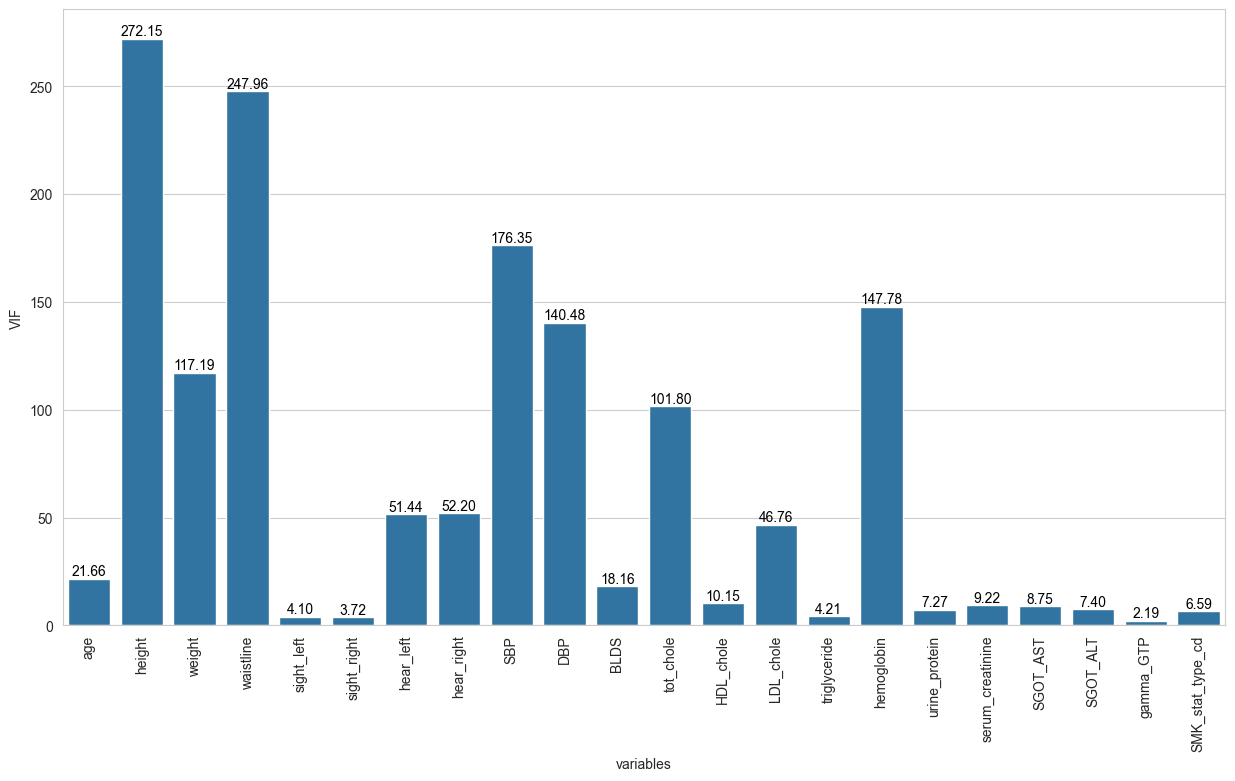

In [113]:
fig = plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=calc_vif(df.drop(['sex', 'DRK_YN'], axis=1)), x='variables', y='VIF'
)

# Rotate the x-axis labels by 90 degrees
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


**Conclusion**
* Here Vif of the features are seems to be highly correlated, for e.g. SBP and DBP these two features shows high vif
* Same with 'hear_left' and 'hear_right' features

**Lets remove some columns causing multicollinearity**

In [114]:
df.drop(['height'],axis=1,inplace = True)

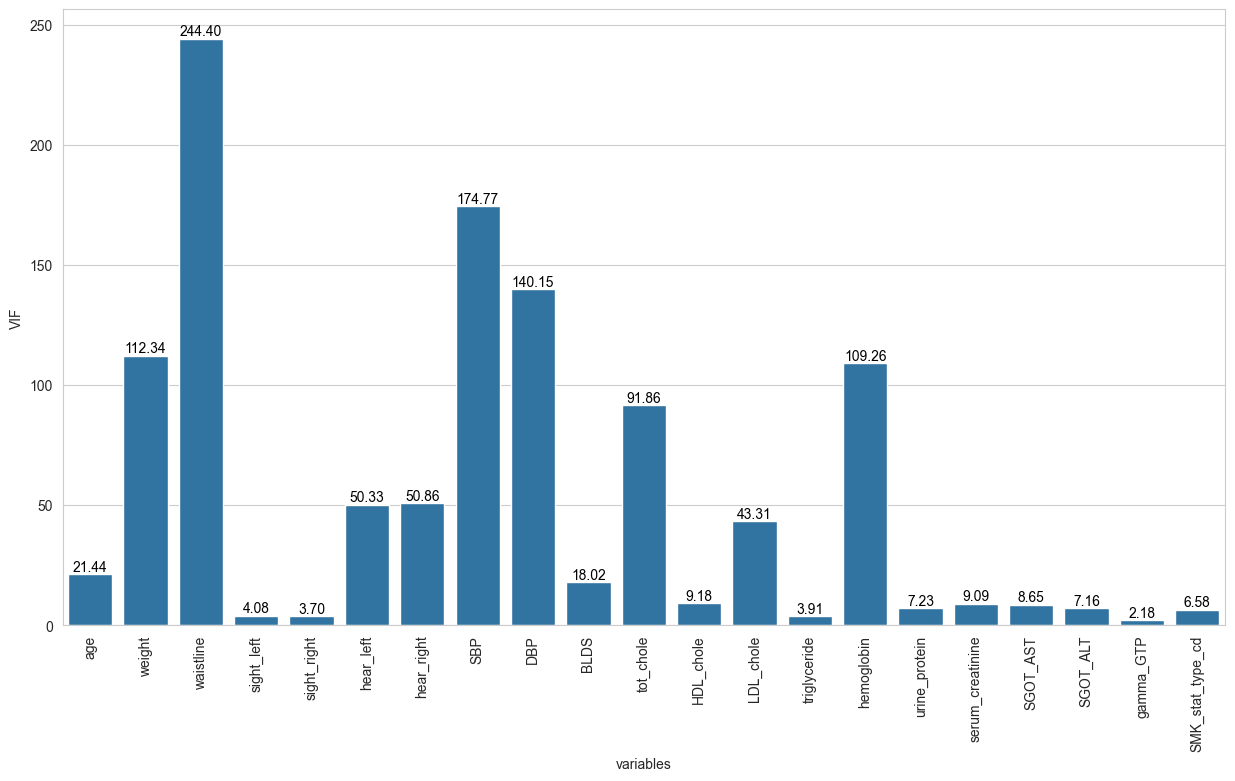

In [115]:
fig = plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=calc_vif(df.drop(['sex', 'DRK_YN'], axis=1)), x='variables', y='VIF'
)

# Rotate the x-axis labels by 90 degrees
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')


**Conclusion** 
* By removing one feature, VIF of other features decreases with the same extent at which the deleted feature was corrleted

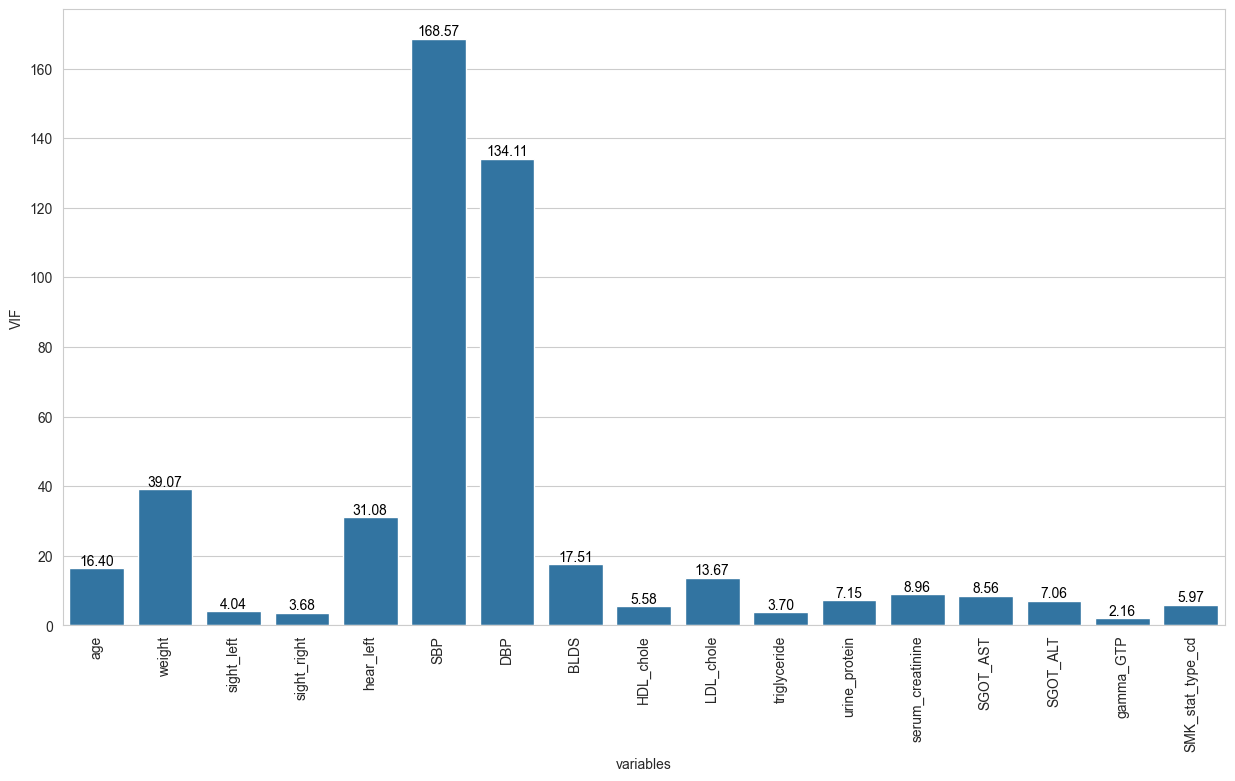

In [116]:
## Lets remove a couple of  features and see the effect
df.drop(['hear_right','waistline','tot_chole','hemoglobin'],axis=1,inplace=True)
fig = plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=calc_vif(df.drop(['sex', 'DRK_YN'], axis=1)), x='variables', y='VIF'
)

# Rotate the x-axis labels by 90 degrees
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

**Conclusion**
* By removing high related features, there is sharp decrement in the vif of other features, for e.g. weigt from 117 to 39 and LDL_chole from 46 to 13

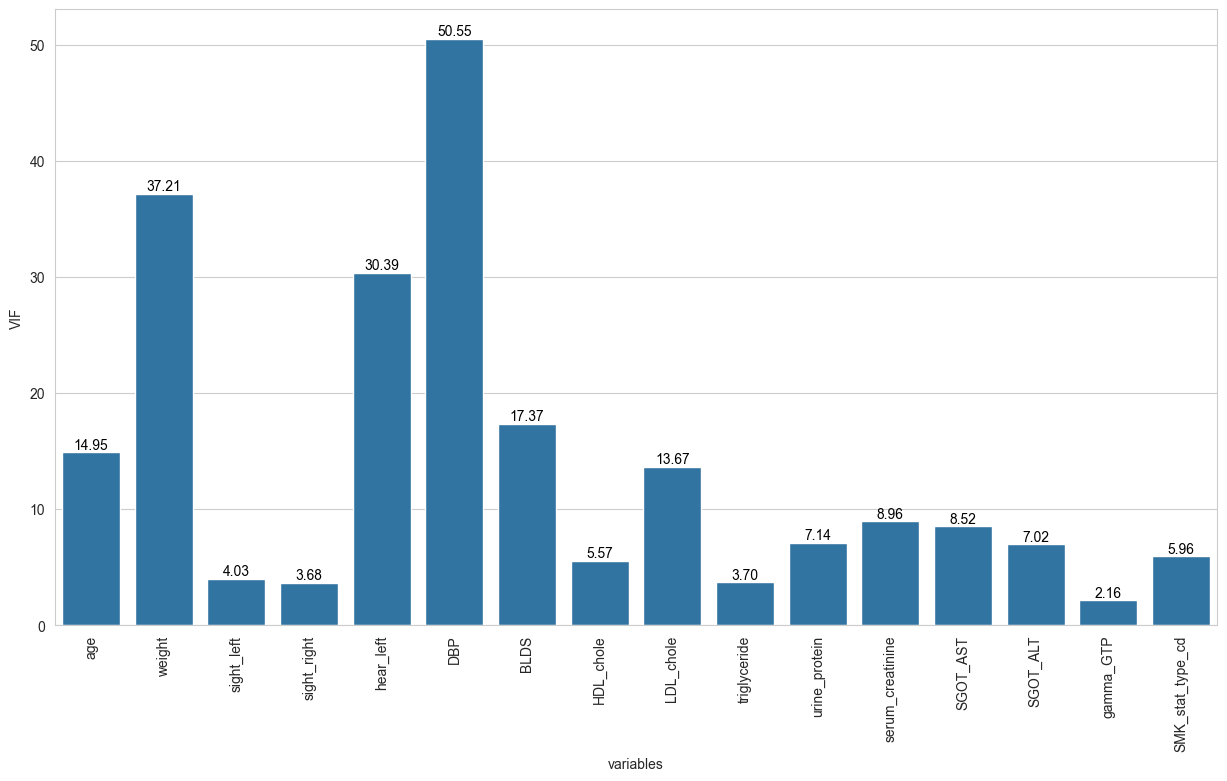

In [117]:
df.drop(['SBP'],axis=1,inplace=True)
fig = plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=calc_vif(df.drop(['sex', 'DRK_YN'], axis=1)), x='variables', y='VIF'
)

# Rotate the x-axis labels by 90 degrees
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

# Add labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

**Conclusion**
* Now vif is ok
* Further dropping the columns can cause loss of information

In [118]:
df.head()

sex  age  weight  sight_left  sight_right  hear_left   DBP   BLDS  \
0  Male   35      75         1.0          1.0        1.0  80.0   99.0   
1  Male   30      80         0.9          1.2        1.0  82.0  106.0   
2  Male   40      75         1.2          1.5        1.0  70.0   98.0   
3  Male   50      80         1.5          1.2        1.0  87.0   95.0   
4  Male   50      60         1.0          1.2        1.0  82.0  101.0   

   HDL_chole  LDL_chole  triglyceride  urine_protein  serum_creatinine  \
0       48.0      126.0          92.0            1.0               1.0   
1       55.0      148.0         121.0            1.0               0.9   
2       41.0       74.0         104.0            1.0               0.9   
3       76.0      104.0         106.0            1.0               1.1   
4       61.0      117.0         104.0            1.0               0.8   

   SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd DRK_YN  
0      21.0      35.0       40.0               1.0      Y  
1      20.0      36.0       27.0               3.0      N  
2      47.0      32.0       68.0               1.0      N  
3      29.0      34.0       18.0               1.0      N  
4      19.0      12.0       25.0               1.0      N

### Separate categorical and continuous columns

In [119]:
categorical_columns = [i for i in df.columns if df[i].dtypes == 'O']
continuous_columns = [i for i in df.columns if df[i].dtypes == 'int64' or df[i].dtypes == 'float64' or df[i].dtypes == 'int32']

In [120]:
print('Categorical columns')
for i in categorical_columns:
    print(i,end= '\t')

Categorical columns
sex	DRK_YN	

In [121]:
print('Continuous columns')
for i in continuous_columns:
    print(i,end= '\t')

Continuous columns
age	weight	sight_left	sight_right	hear_left	DBP	BLDS	HDL_chole	LDL_chole	triglyceride	urine_protein	serum_creatinine	SGOT_AST	SGOT_ALT	gamma_GTP	SMK_stat_type_cd	

### Visualizations 

Error in callback <function _draw_all_if_interactive at 0x00000193C55D2840> (for post_execute):



KeyboardInterrupt



<Figure size 1500x800 with 0 Axes>

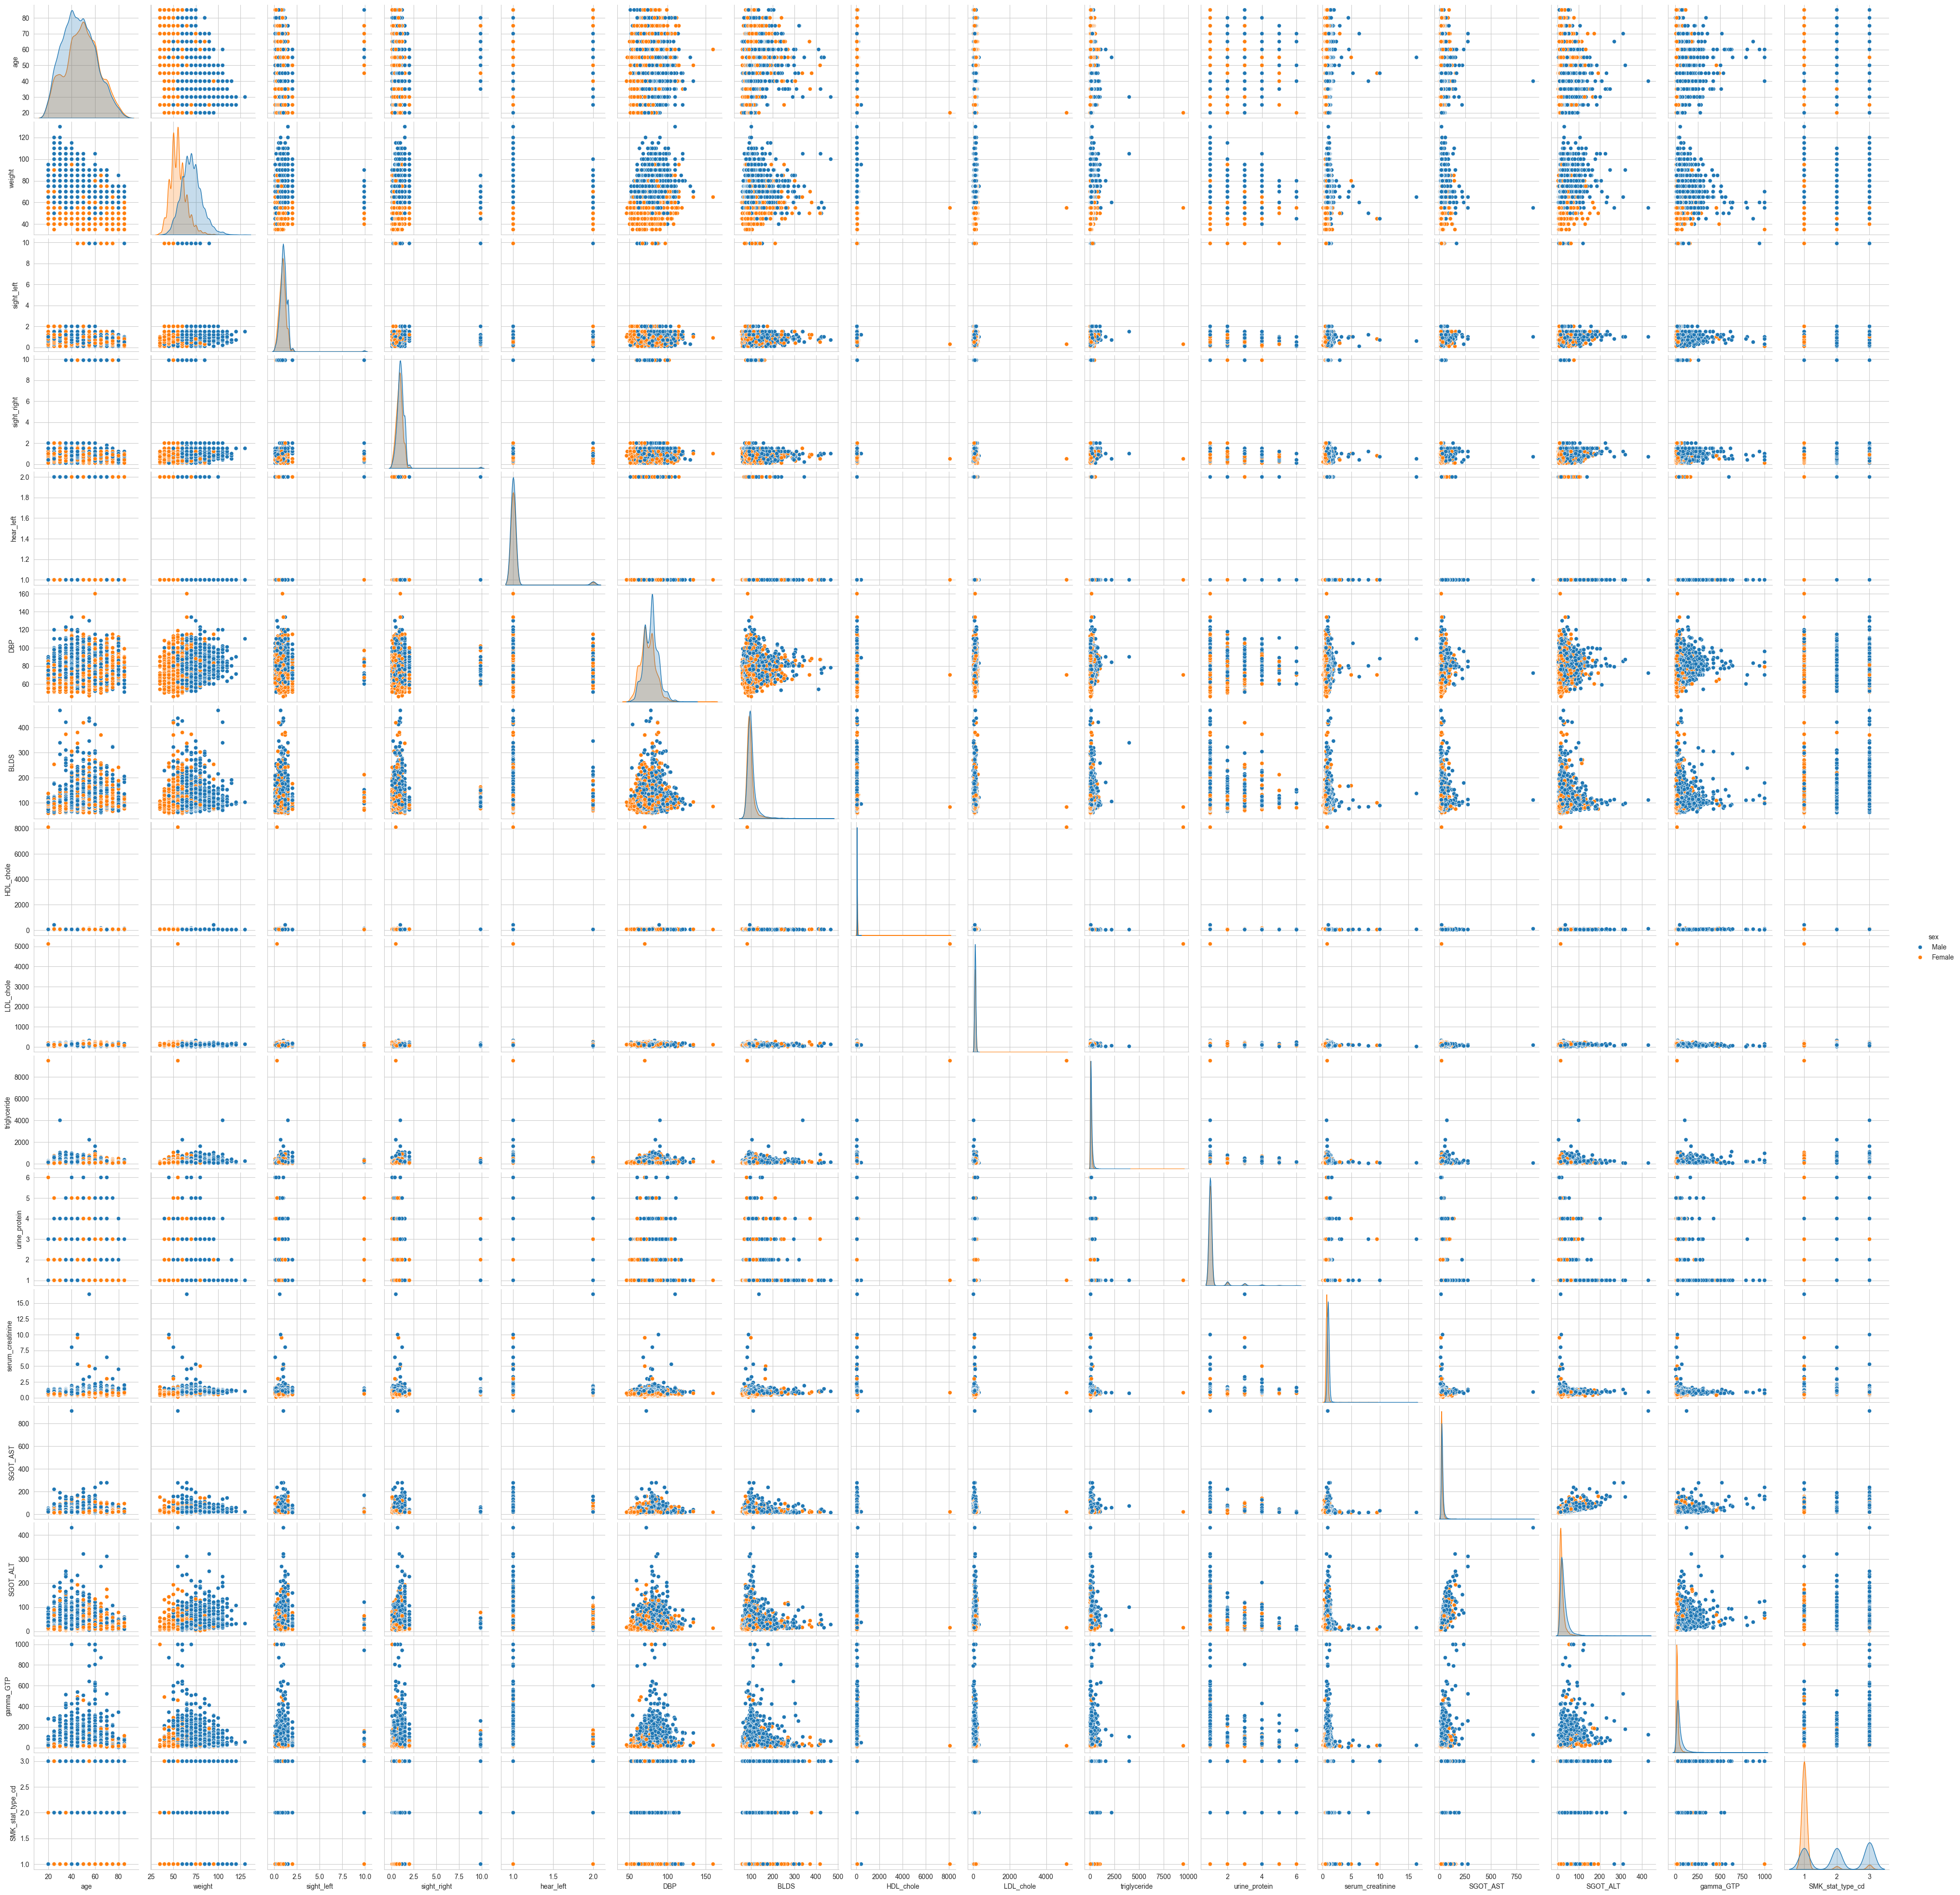

In [122]:
plt.figure(figsize=(15,8))
sns.pairplot(
    data = df , hue='sex'
)

**Conclusion**
* Clear images of Dominating factor of male over female in Drinking/Smoking
* In all the factors ( tyiglyceride , Blood pressure , etc.. ) males are showing high presence of it

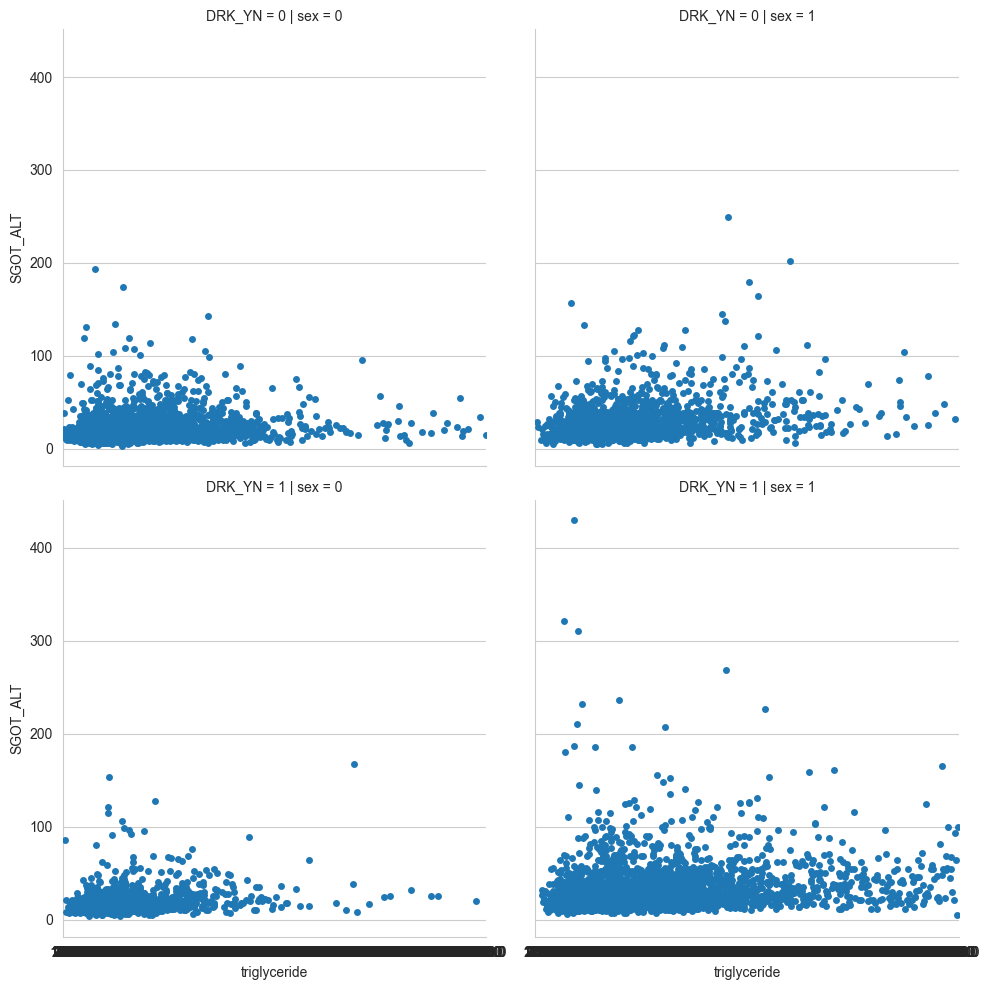

In [173]:

sns.catplot(
    data  =df ,x = 'triglyceride',y= 'SGOT_ALT', col= 'sex',row='DRK_YN'
)

**Interpretations**
* Drinkers SGOT_ALT is high in male then female
* In non drinkers presence of SGOT_ALT is almost same

In [174]:
print('Total columns')
for colum in df.columns:
    print(colum, end = '\t')

Total columns
sex	age	weight	sight_left	sight_right	hear_left	DBP	BLDS	HDL_chole	LDL_chole	triglyceride	urine_protein	serum_creatinine	SGOT_AST	SGOT_ALT	gamma_GTP	SMK_stat_type_cd	DRK_YN	

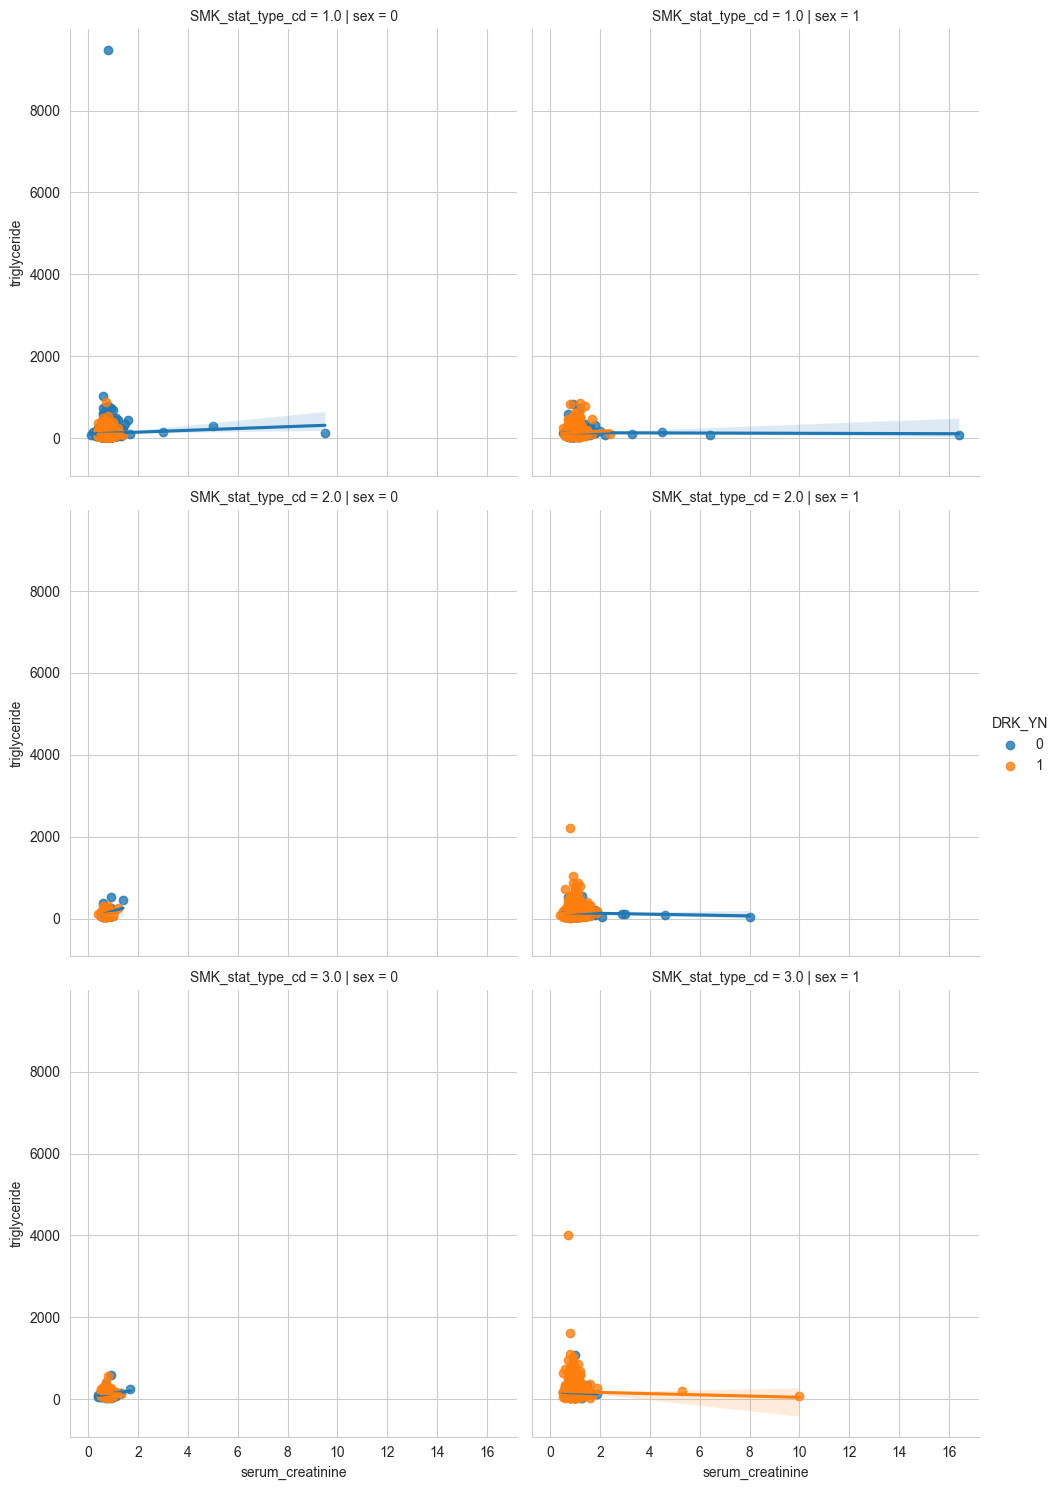

In [175]:
  # Bivariate analysis
sns.lmplot(
        data = df , x = 'serum_creatinine' ,y = 'triglyceride', col='sex' , hue='DRK_YN' , row='SMK_stat_type_cd'
    )

**Conclusion**
* Analysis is not going good because of some outliers.
* It would be better to deal with outliers first

### Dealing with Outliers

In [176]:
def plot_boxplots(dataframe):
    num_columns = dataframe.select_dtypes(include=['number']).columns
    print(num_columns)
    num_plots = len(num_columns)
    rows = (num_plots + 1) // 2 

    fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(20, 20))

    for i, column in enumerate(num_columns):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        sns.boxplot(x=dataframe[column], ax=ax)
        ax.set_title(f"Boxplot of {column}")
        ax.set_xlabel(column)

    plt.tight_layout()
    plt.show()

Index(['sex', 'age', 'weight', 'sight_left', 'sight_right', 'hear_left', 'DBP',
       'BLDS', 'HDL_chole', 'LDL_chole', 'triglyceride', 'urine_protein',
       'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP',
       'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')


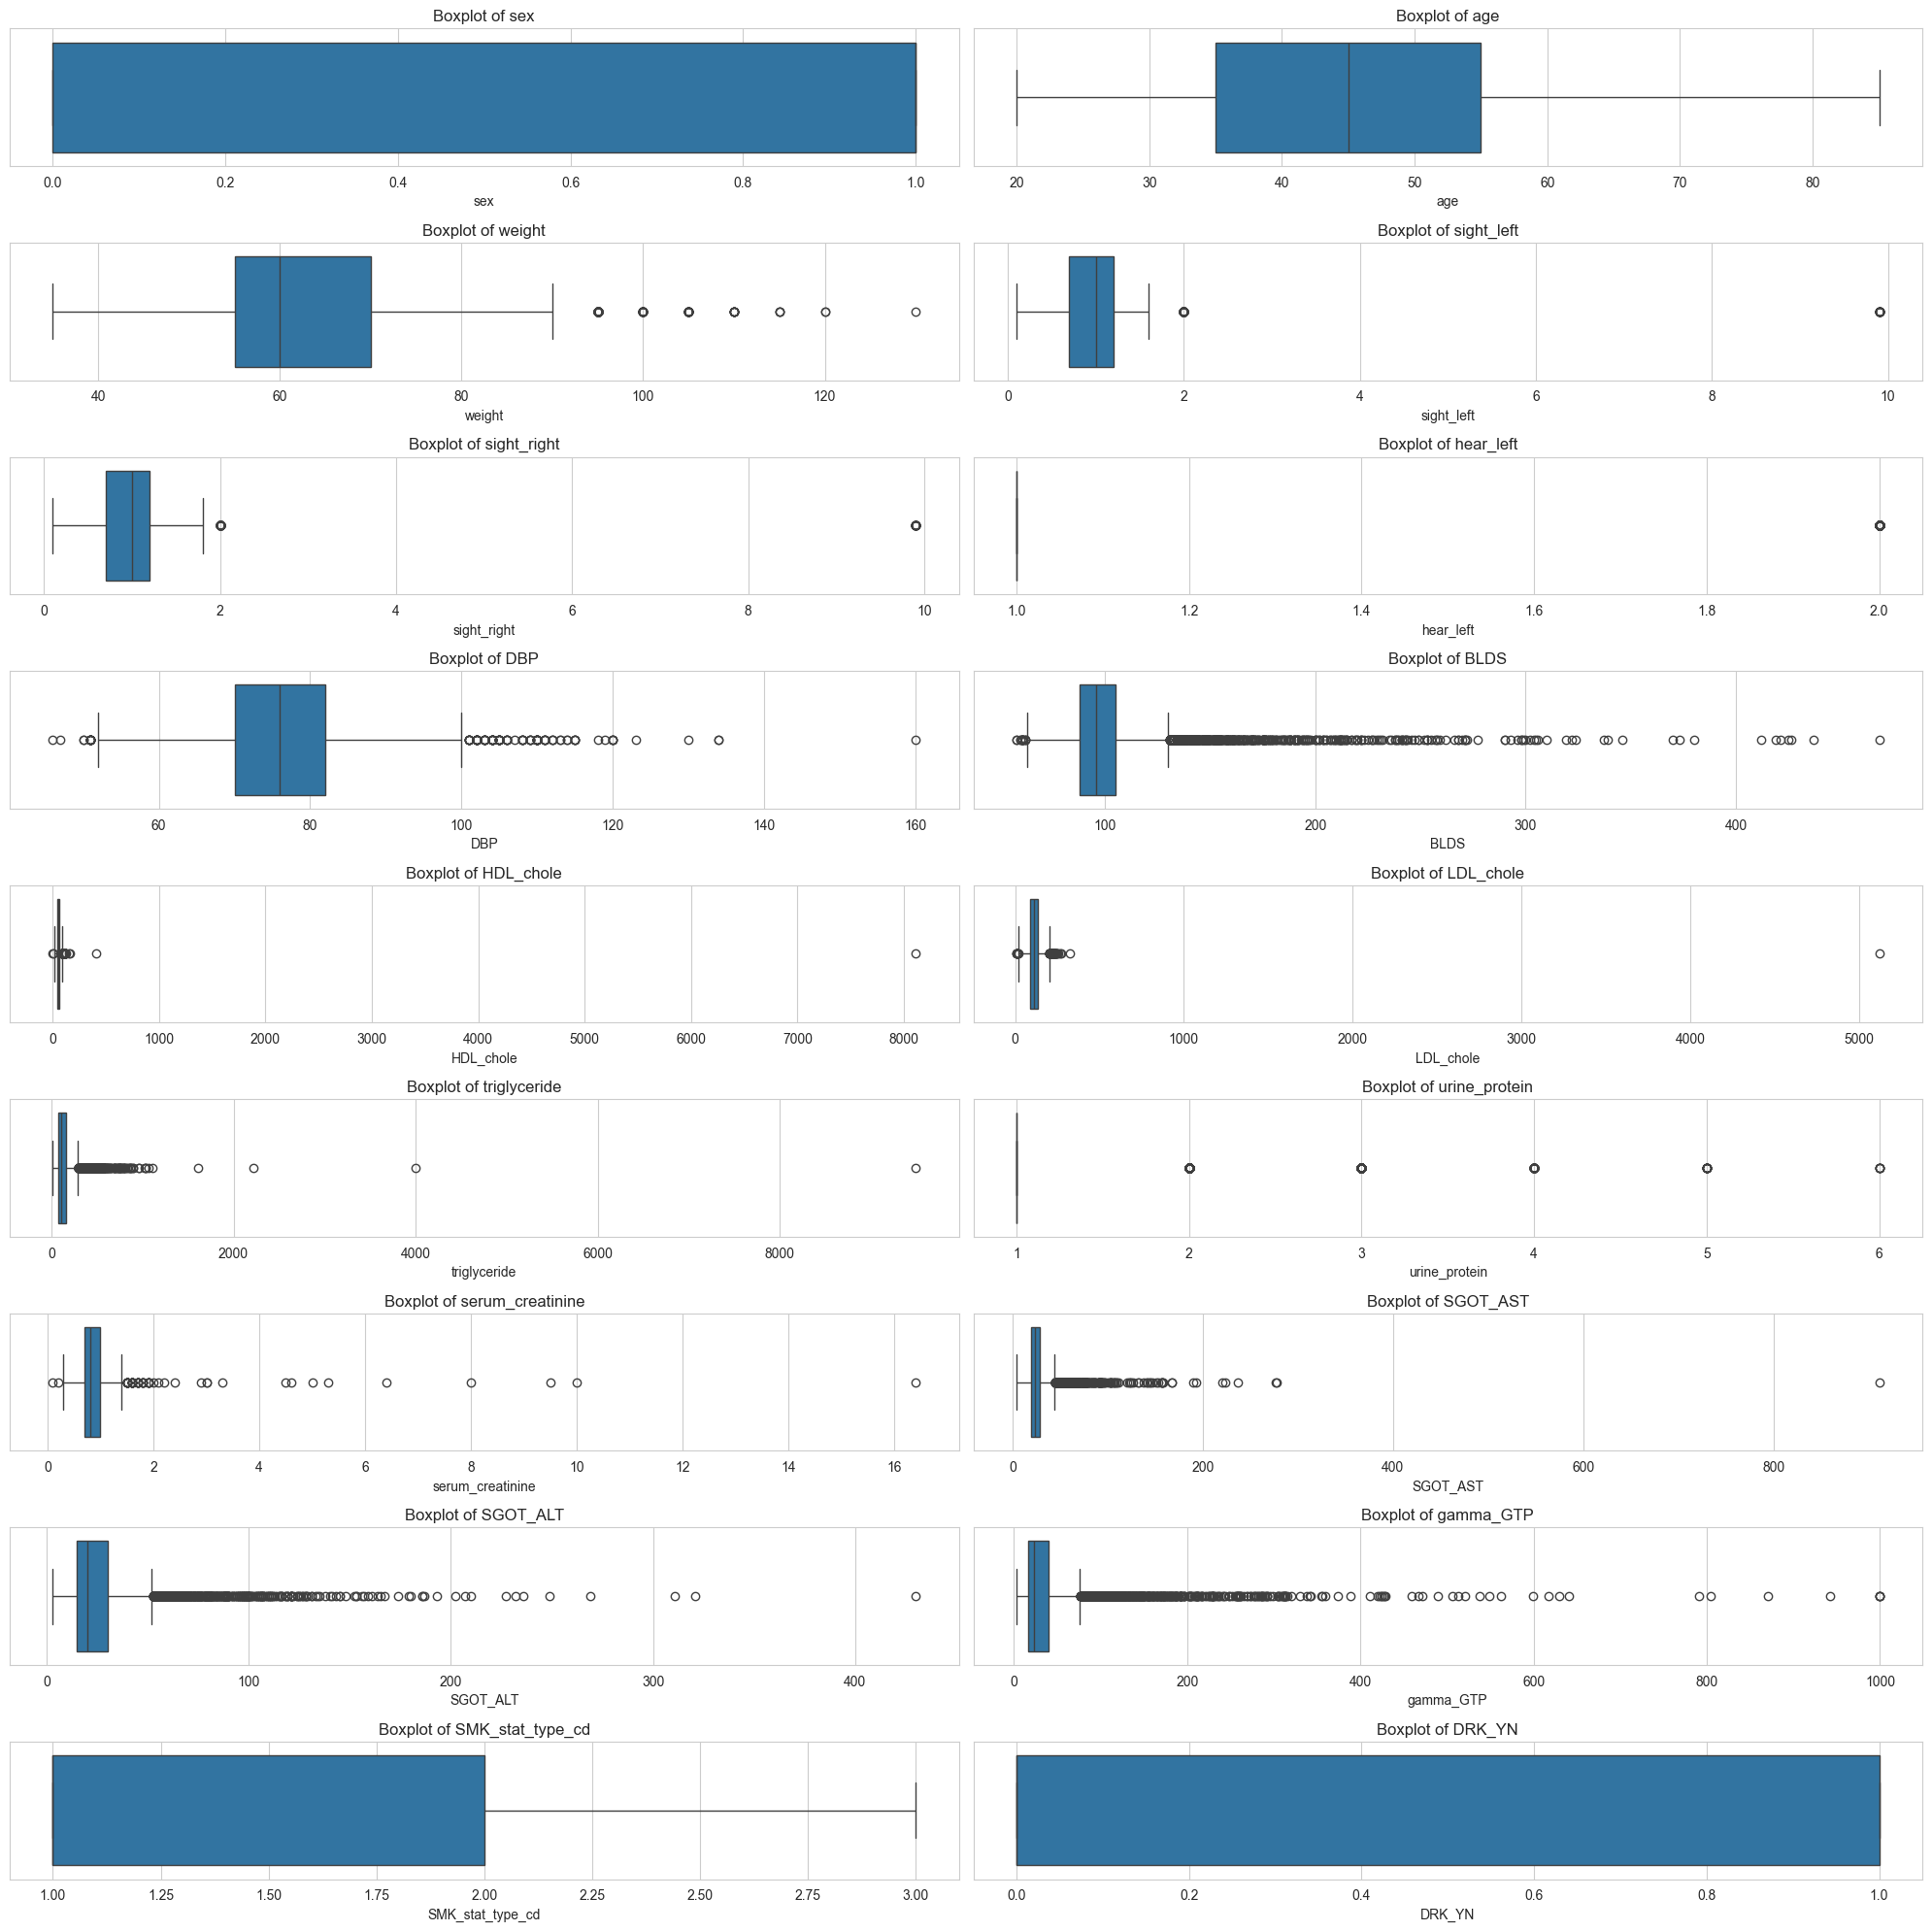

In [177]:
plot_boxplots(df)

**What to remove**
* Weights greater than 120
* sight_left >= 2 (same for sight_right)
* DBP > 120
* BLDS > 350
* HDL_chole, which is maximum
* LDL_chole, which is maximum
* triglyceride , >= 4th largest
* serum >=8
* SGOT_AST > 200 (same for SGOT_ALT)
* gamma_GTP > 600

**Dropping outlier values at some extent(Not all)**

**Imp - Removing all outliers can significantly impact the model becuase of the Information loss** 

In [178]:
rows_before_drop = len(df)
print('Total rows before dropping outliers {}'.format(len(df)))

Total rows before dropping outliers 9000


#### Removing the outliers process begins

In [179]:
print('Total Rows before removing outliers {}'.format(len(df)))
df.drop(df['weight'].loc[df['weight'] >= 120].index,inplace=True)
print('Total Rows after removing outliers {}'.format(len(df)))
print(df.shape)

Total Rows before removing outliers 9000
Total Rows after removing outliers 8997
(8997, 18)


In [180]:
print('Total Rows before removing outliers {}'.format(len(df)))
print(len(df['sight_right'].loc[df['sight_right'] >=2]))
df.drop(df['sight_right'].loc[df['sight_right'] >=2].index,inplace = True)
print('Total Rows after removing outliers {}'.format(len(df)))


Total Rows before removing outliers 8997
106
Total Rows after removing outliers 8891


In [181]:
print('Total Rows before removing outliers {}'.format(len(df)))
print(len(df['sight_left'].loc[df['sight_left'] >=2]))
df.drop(df['sight_left'].loc[df['sight_left'] >=2].index ,inplace =True)
print('Total Rows after removing outliers {}'.format(len(df)))

Total Rows before removing outliers 8891
75
Total Rows after removing outliers 8816


In [182]:
print('Total Rows before removing outliers {}'.format(len(df)))
print(len(df['DBP'].loc[df['DBP'] > 120]))
df.drop(df['DBP'].loc[df['DBP'] > 120].index, inplace=True)
print('Total Rows after removing outliers {}'.format(len(df)))

Total Rows before removing outliers 8816
5
Total Rows after removing outliers 8811


In [183]:
print('Total Rows before removing outliers {}'.format(len(df)))
print(len(df['BLDS'].loc[df['BLDS'] > 350]))
df.drop(df['BLDS'].loc[df['BLDS'] > 350].index, inplace =True)
print('Total Rows after removing outliers {}'.format(len(df)))

Total Rows before removing outliers 8811
10
Total Rows after removing outliers 8801


In [184]:
max_value = df['LDL_chole'].loc[df['LDL_chole'].values.max()]
print(len(df['LDL_chole'].loc[df['LDL_chole'] == max_value]))
df.drop(df['LDL_chole'].loc[df['LDL_chole'] == max_value].index, inplace = True)
print('Total Rows after removing outliers {}'.format(len(df)))

108
Total Rows after removing outliers 8693


In [185]:
max_value = df['HDL_chole'].loc[df['HDL_chole'].values.max()]
print(len(df['HDL_chole']))
print(len(df['HDL_chole'].loc[df['HDL_chole'] == max_value]))
df.drop(df['HDL_chole'].loc[df['HDL_chole'] == max_value].index, inplace = True)
print('Total Rows after removing outliers {}'.format(len(df)))

8693
225
Total Rows after removing outliers 8468


In [186]:
print('Total Rows before removing outliers {}'.format(len(df)))
df.drop(df.nlargest(4,'triglyceride').index,inplace = True)
print('Total Rows after removing outliers {}'.format(len(df)))

Total Rows before removing outliers 8468
Total Rows after removing outliers 8464


In [187]:
print('Total Rows before removing outliers {}'.format(len(df)))
print(len(df['serum_creatinine'].loc[df['serum_creatinine'] >=8]))
df.drop(df['serum_creatinine'].loc[df['serum_creatinine'] >=8].index, inplace = True)
print('Total Rows after removing outliers {}'.format(len(df)))

Total Rows before removing outliers 8464
4
Total Rows after removing outliers 8460


In [188]:
print('Total Rows before removing outliers {}'.format(len(df)))
print(len(df['SGOT_AST'].loc[df['SGOT_AST'] >= 200]))
df.drop(df['SGOT_AST'].loc[df['SGOT_AST'] >= 200].index,inplace =True)
print('Total Rows after removing outliers {}'.format(len(df)))

      

Total Rows before removing outliers 8460
6
Total Rows after removing outliers 8454


In [189]:
print('Total Rows before removing outliers {}'.format(len(df)))
print(len(df['SGOT_ALT'].loc[df['SGOT_ALT'] >= 200]))
df.drop(df['SGOT_ALT'].loc[df['SGOT_ALT'] >= 200].index,inplace =True)
print('Total Rows after removing outliers {}'.format(len(df)))

Total Rows before removing outliers 8454
5
Total Rows after removing outliers 8449


In [190]:
print('Total Rows before removing outliers {}'.format(len(df)))
print(len(df['gamma_GTP'].loc[df['gamma_GTP'] > 600]))
df.drop(df['gamma_GTP'].loc[df['gamma_GTP'] > 600].index ,inplace = True)
print('Total Rows after removing outliers {}'.format(len(df)))

Total Rows before removing outliers 8449
8
Total Rows after removing outliers 8441


In [191]:
print('Total rows after removing the outliers {}'.format(len(df)))
rows_after_drop = len(df)

Total rows after removing the outliers 8441


In [192]:
print('Toal {} row containing outliers are removed'.format(rows_before_drop - rows_after_drop))

Toal 559 row containing outliers are removed


## Visuals after removing outliers

Index(['sex', 'age', 'weight', 'sight_left', 'sight_right', 'hear_left', 'DBP',
       'BLDS', 'HDL_chole', 'LDL_chole', 'triglyceride', 'urine_protein',
       'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP',
       'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')


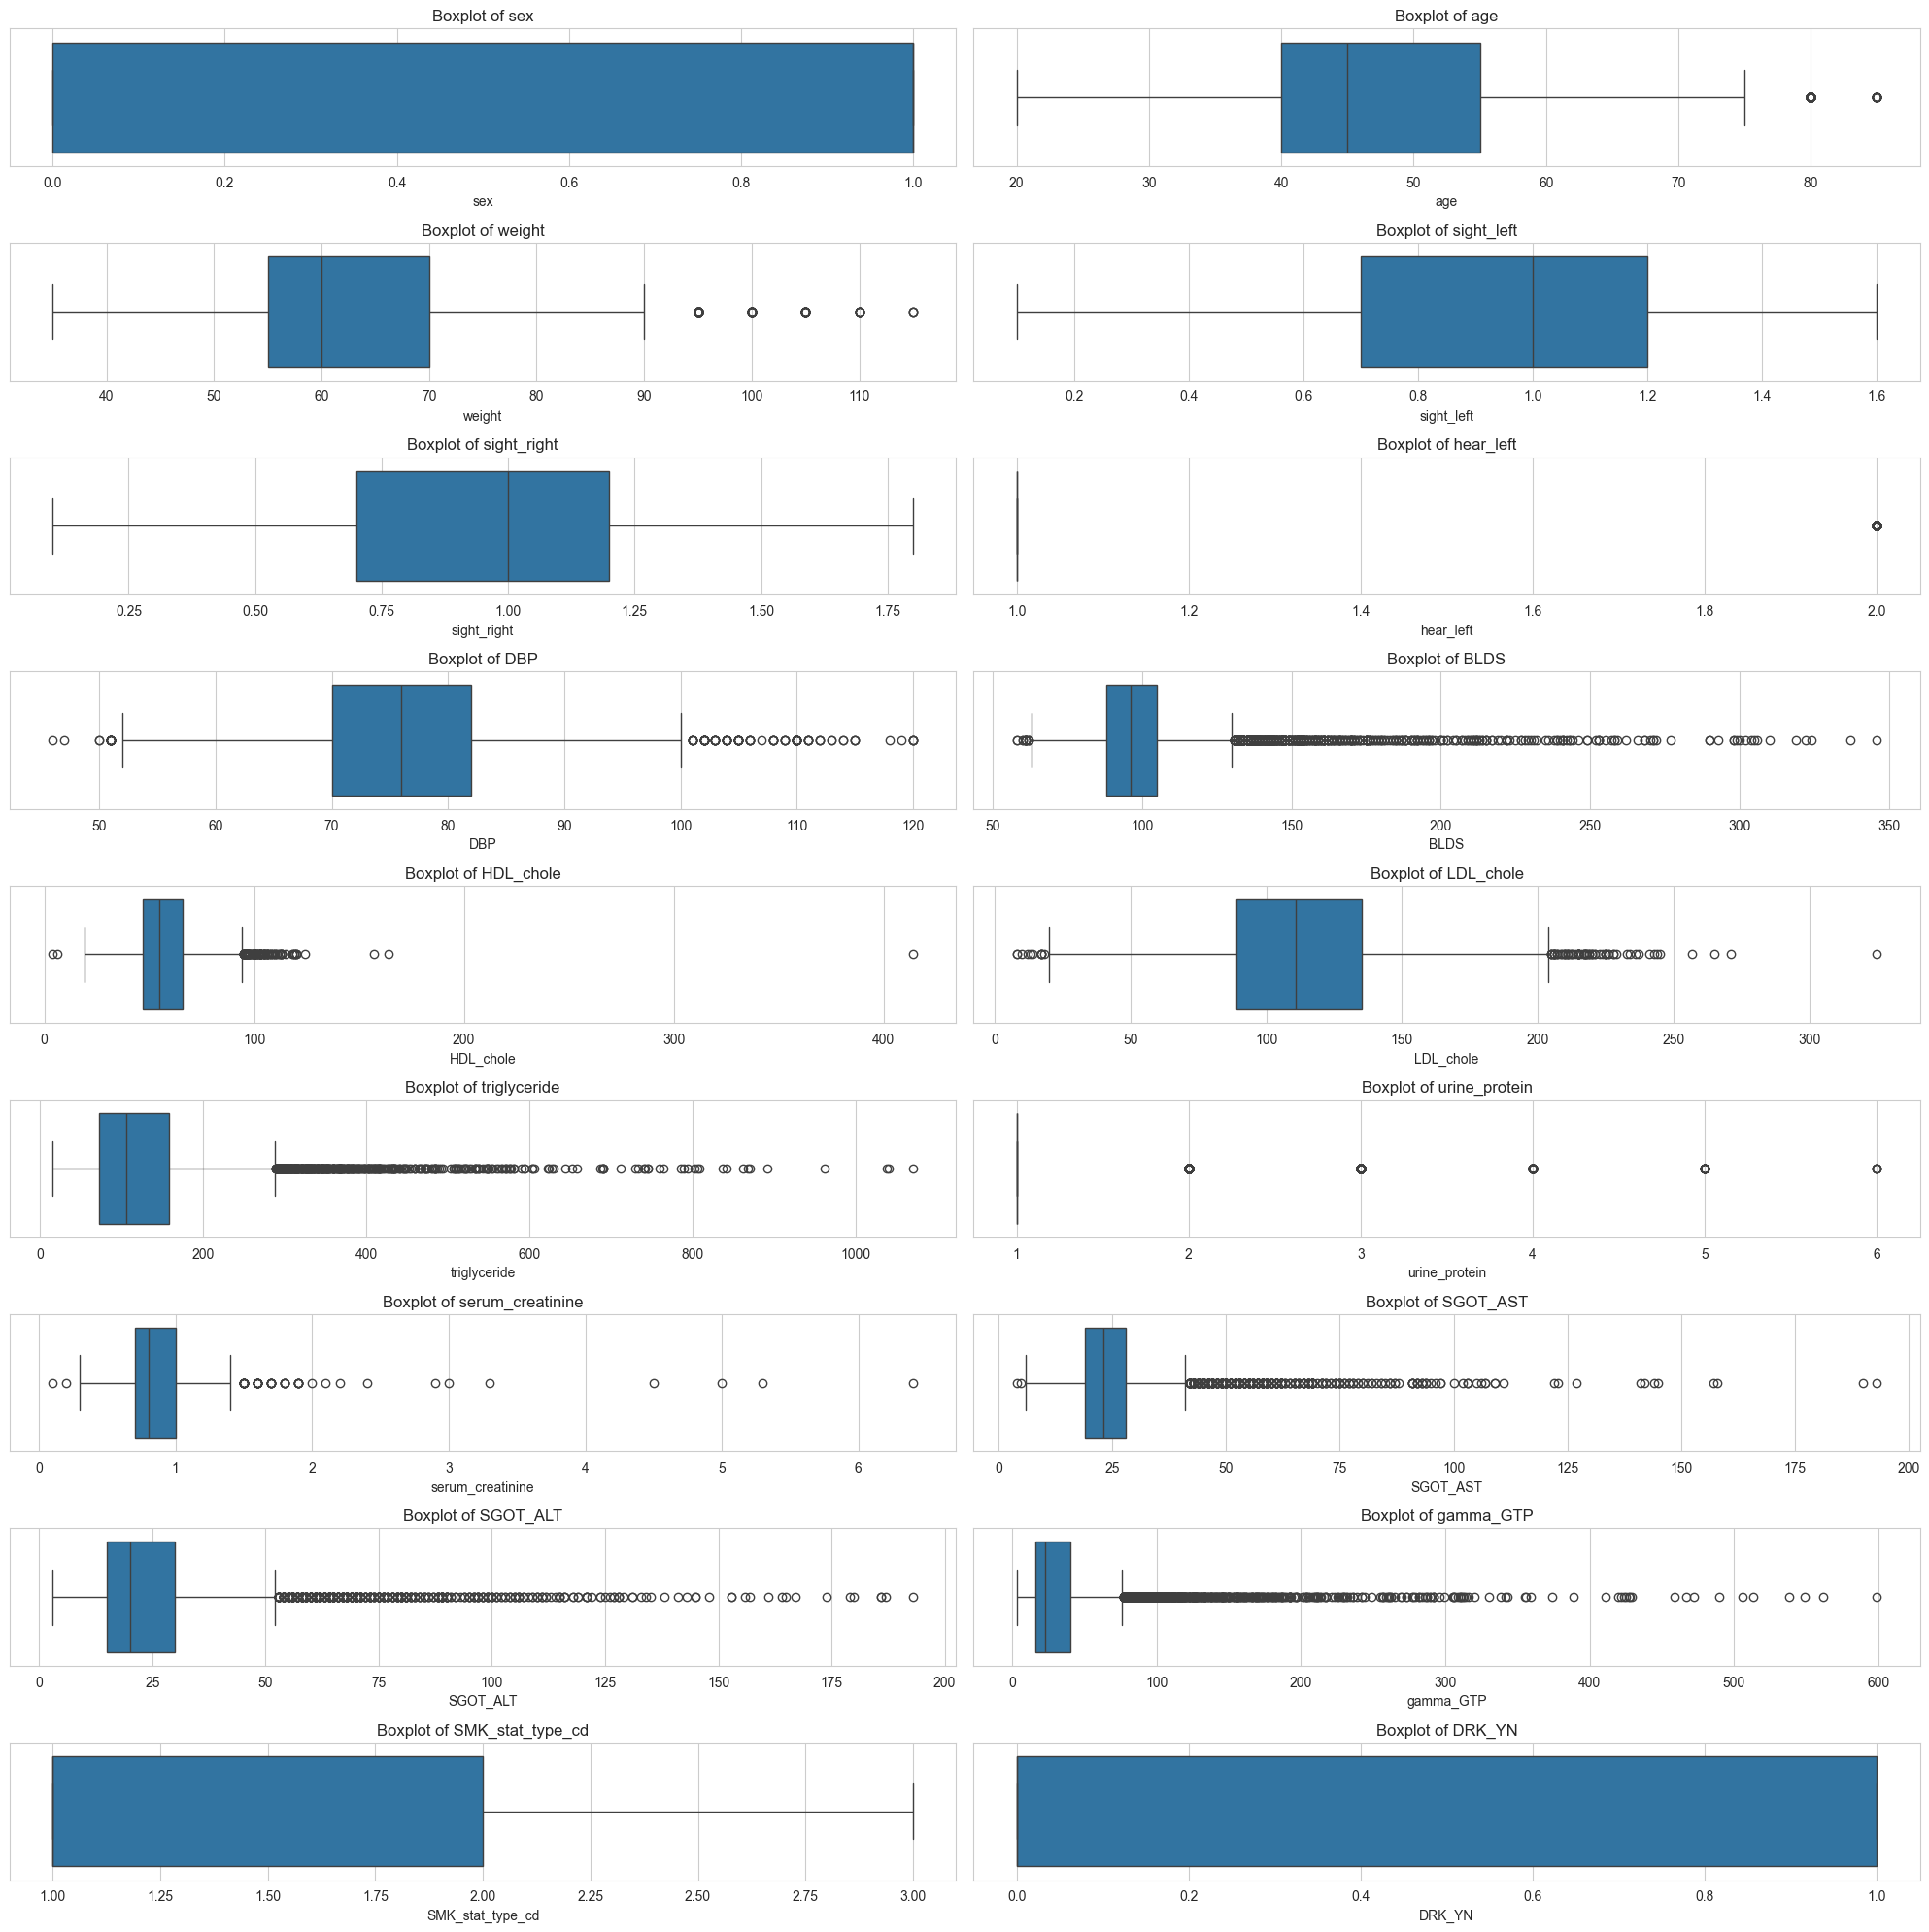

In [193]:
plot_boxplots(df)

**Interpretations**
* Still some outliers are present in the dataset, Otherwise we would have lost the important information about dataset
**Future operations**
* Will scaledown the values so that outliers effect can be reduced

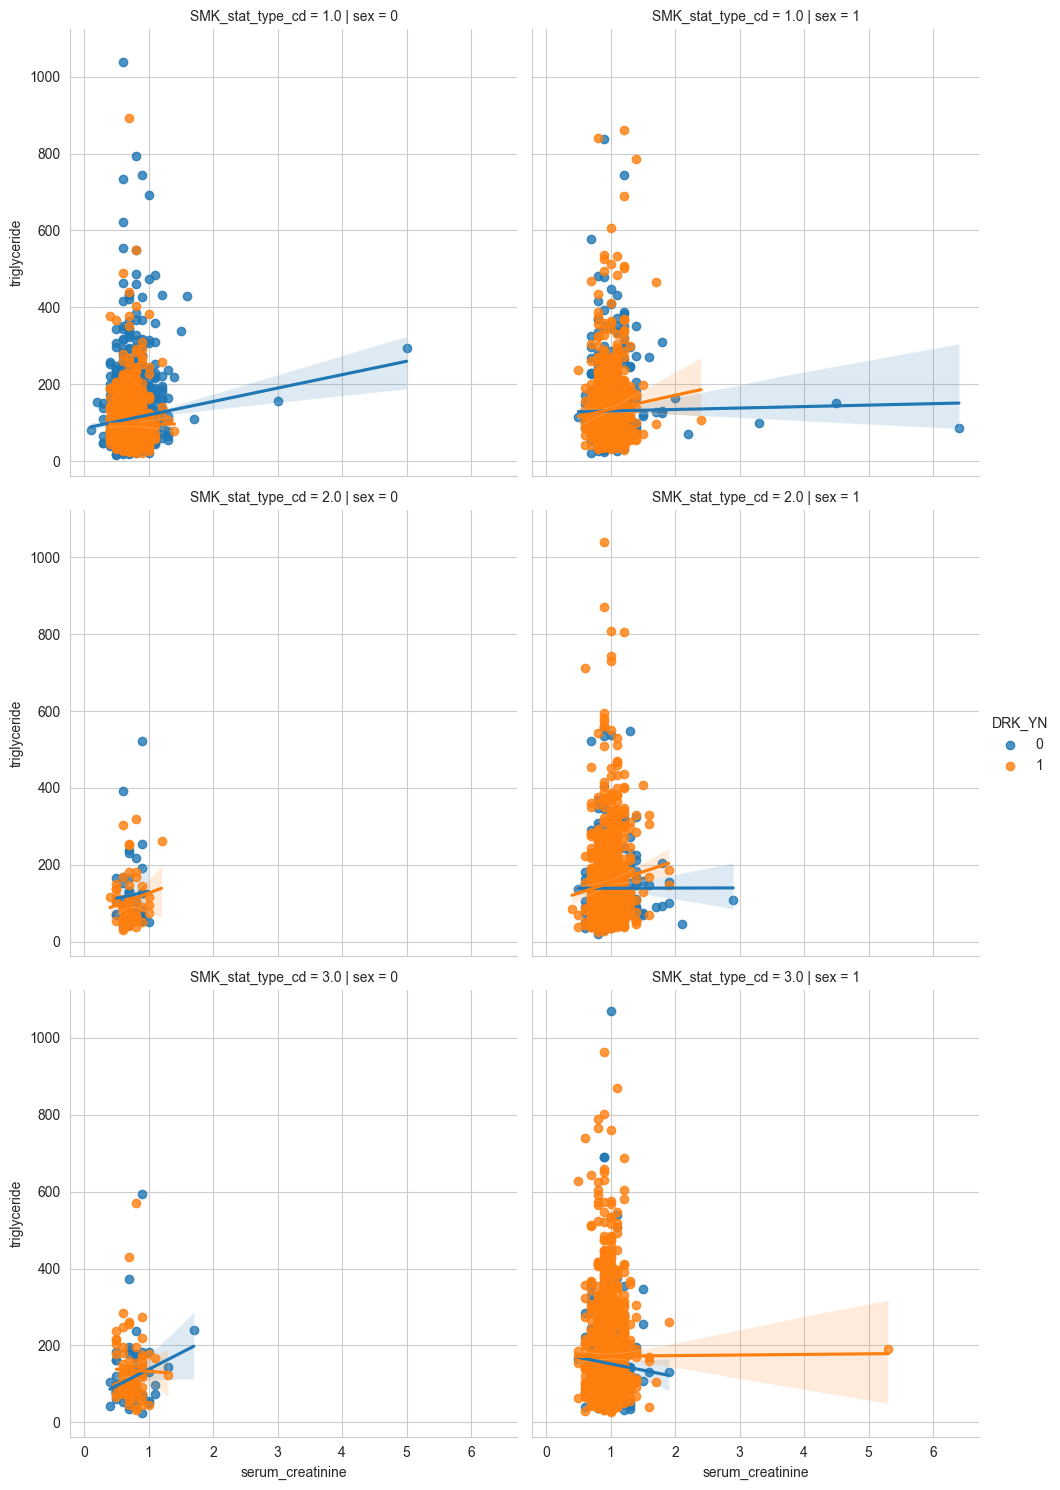

In [194]:
# Bivariate analysis
sns.lmplot(
    data = df , x = 'serum_creatinine' ,y = 'triglyceride', col='sex' , hue='DRK_YN' , row='SMK_stat_type_cd'
)

**Interpretations**
* According to report , "trend of **increased** cTG was observed in men with moderate and high alcohol intake after dinner and at bedtime (p for trend <0.001) which persisted after adjustment for age, smoking and body mass index"
* **What relationship creatinine holds with drinking habits?** 
*  Adults with a higher weekly alcohol consumption had significantly **lower** levels of creatine
* ** How smoking habit is associated with triglyceride ?
* According to reports, "We examined the relationships of cigarette smoking with fasting triglycerides, total cholesterol, and high-density lipoprotein cholesterol (HDL-C) levels among a group of 191 white women aged 20 to 40 years. The mean triglyceride level among current smokers was 100.0 mg/100 ml and among nonsmokers was 68.4 mg/dl (p less than 0.005). "
* **Some interpretations we can match with the actual reports are -**
* Females usually holds less concentration of triglyceride than males 
* High triglyceride in smokers especially in male than female( fig, reference - [3,1])
* **Some authentic references of the quoted experiments are -**
* ref1 - "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3875928/"
*  ref2 - "https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6961205/#:~:text=Crucially%2C%20adults%20with%20a%20higher,deficit%20in%20their%20hippocampal%20metabolism."
* ref3 - "https://pubmed.ncbi.nlm.nih.gov/6829404/"
* 

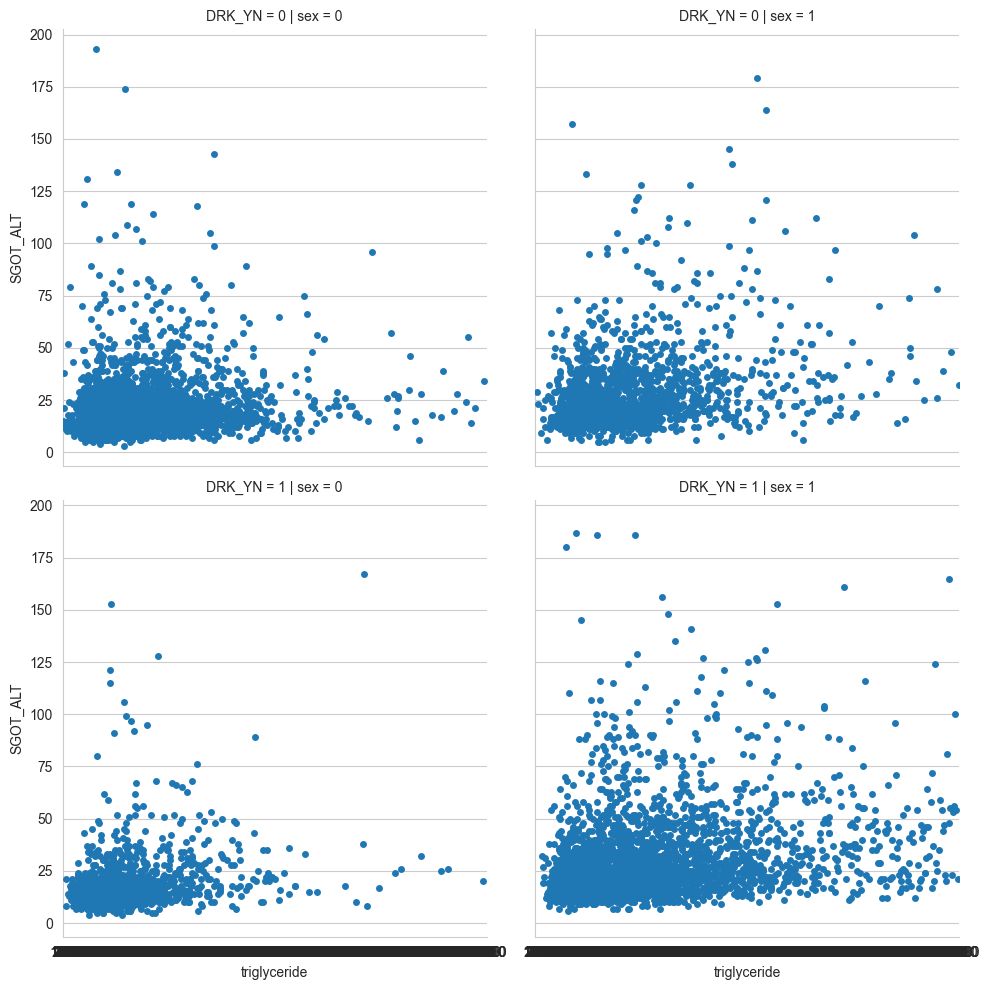

In [195]:
sns.catplot(
    data  =df ,x = 'triglyceride',y= 'SGOT_ALT', col= 'sex',row='DRK_YN'
)


**Interpretations**
* High SGOT_ALT for the male then female
* And for Drinkers above interpretation holds more strongly
* 

#### Frequency distributions of feaures

<Axes: xlabel='DBP', ylabel='Count'>

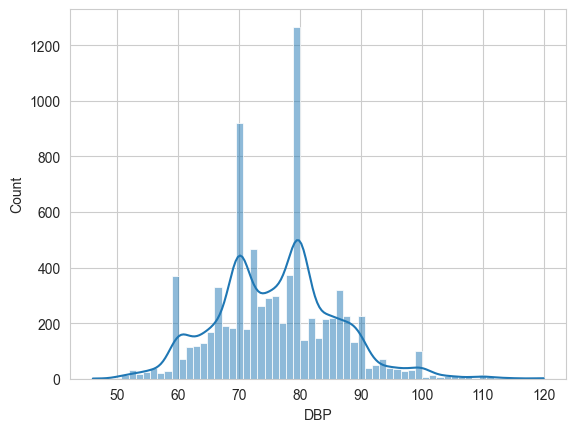

In [196]:
sns.histplot(
    data = df , x='DBP', kde =True , multiple='stack'
)

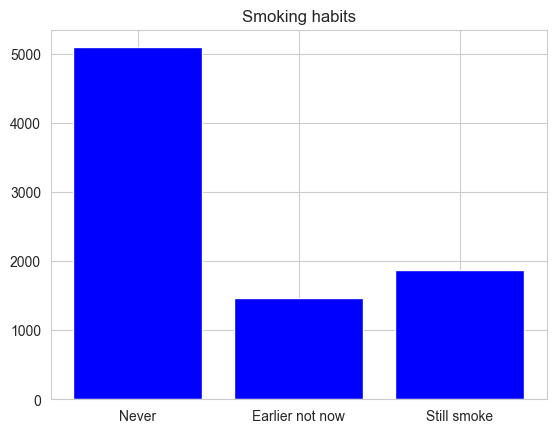

In [197]:
df['SMK_stat_type_cd'].value_counts()
x_axis = df['SMK_stat_type_cd'].value_counts().index
y_axis = df['SMK_stat_type_cd'].value_counts().values
category_labels  = {1.0 : 'Never', 2.0 : 'Earlier not now',3.0 : 'Still smoke'}
plt.bar(x_axis,y_axis, color = 'blue' , tick_label=[category_labels[x] for x in x_axis])
plt.title('Smoking habits')
legend_labels = [f'{int(x)}: {category_labels[x]}' for x in x_axis]
plt.show()


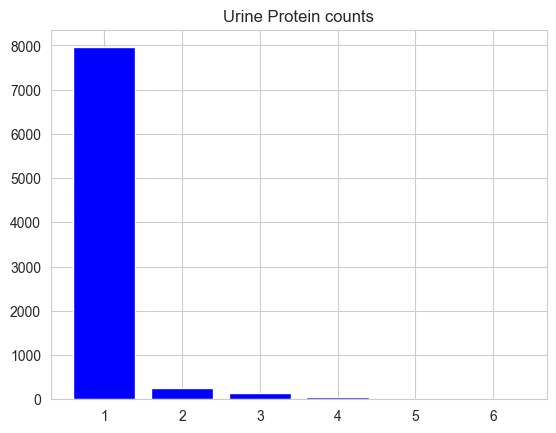

In [198]:
df['urine_protein'].value_counts()
x_axis = df['urine_protein'].value_counts().index
y_axis = df['urine_protein'].value_counts().values
plt.bar(x_axis,y_axis, color = 'blue')
plt.title('Urine Protein counts')
plt.show()

<Axes: xlabel='HDL_chole', ylabel='Count'>

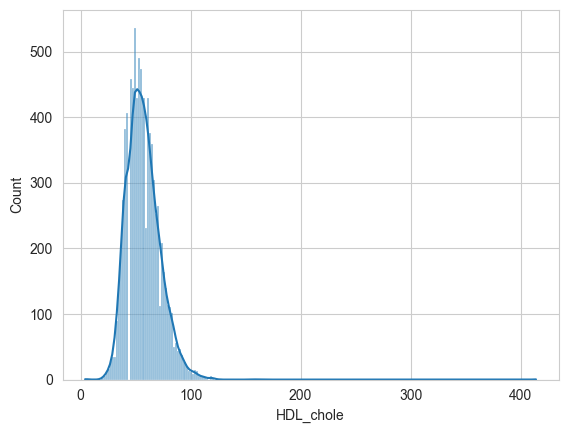

In [199]:
sns.histplot(
    data = df , x='HDL_chole', kde =True , multiple='stack'
)

<Axes: xlabel='triglyceride', ylabel='Count'>

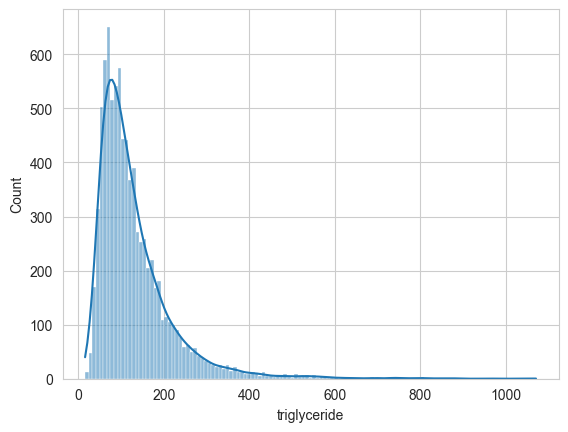

In [200]:
sns.histplot(
    data = df , x='triglyceride', kde =True , multiple='stack'
)


**Conclusion**
* There is obviously many outliers in the dataset

# Feature scaling(Normalization) and Labelencoding

**What is Feature scaling? What is the role of feature scaling in machine learning?**
*Before feeding data into the machine learning models, We need to make sure that data should be scaled properly.*
*Process of scaling feature values is known as feature scaling*
*Real-world datasets often contain features that are varying in degrees of magnitude, range, and units.*
*Without scaling down the values , model can generate non accurate results.*

In [124]:
encoder = LabelEncoder()
## converting 'sex' feature into numerical
df['sex'] = encoder.fit_transform(df['sex'])
df['DRK_YN'] = encoder.fit_transform(df['DRK_YN'])

## Normalizing all the features
normalize = Normalizer()
normalized_without_output_feature = df.drop(['DRK_YN',],axis= 1)
normalize.fit(normalized_without_output_feature)
normalized = normalize.transform(normalized_without_output_feature)
X_normalized = pd.DataFrame(normalized,columns=df.columns[:-1])

**How normalized data looks like**

In [126]:
X_normalized

sex       age    weight  sight_left  sight_right  hear_left  \
0     0.004345  0.152076  0.325878    0.004345     0.004345   0.004345   
1     0.003856  0.115667  0.308446    0.003470     0.004627   0.003856   
2     0.004585  0.183402  0.343879    0.005502     0.006878   0.004585   
3     0.004239  0.211948  0.339117    0.006358     0.005087   0.004239   
4     0.004369  0.218451  0.262141    0.004369     0.005243   0.004369   
...        ...       ...       ...         ...          ...        ...   
8995  0.000000  0.292736  0.209097    0.002091     0.002509   0.004182   
8996  0.003089  0.138991  0.216208    0.003706     0.003706   0.003089   
8997  0.000000  0.194023  0.155218    0.003880     0.003492   0.003880   
8998  0.003858  0.135019  0.231461    0.004629     0.005787   0.003858   
8999  0.002862  0.200312  0.228928    0.002575     0.002862   0.002862   

           DBP      BLDS  HDL_chole  LDL_chole  triglyceride  urine_protein  \
0     0.347603  0.430158   0.208562   0.547474      0.399743       0.004345   
1     0.316157  0.408691   0.212057   0.570625      0.466525       0.003856   
2     0.320954  0.449336   0.187987   0.339294      0.476846       0.004585   
3     0.368790  0.402702   0.322161   0.440853      0.449330       0.004239   
4     0.358259  0.441271   0.266510   0.511175      0.454378       0.004369   
...        ...       ...        ...        ...           ...            ...   
8995  0.271827  0.518561   0.242553   0.246735      0.602200       0.004182   
8996  0.191498  0.284159   0.138991   0.509632      0.568317       0.003089   
8997  0.353122  0.504460   0.275513   0.628634      0.271632       0.003880   
8998  0.293184  0.432061   0.231461   0.246892      0.721387       0.003858   
8999  0.197450  0.432101   0.120187   0.271852      0.752600       0.008585   

      serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  
0             0.004345  0.091246  0.152076   0.173801          0.004345  
1             0.003470  0.077111  0.138801   0.104101          0.011567  
2             0.004127  0.215498  0.146722   0.311784          0.004585  
3             0.004663  0.122930  0.144125   0.076301          0.004239  
4             0.003495  0.083011  0.052428   0.109225          0.004369  
...                ...       ...       ...        ...               ...  
8995          0.002091  0.133822  0.112913   0.121276          0.004182  
8996          0.002162  0.191498  0.327400   0.265627          0.003089  
8997          0.001940  0.065968  0.065968   0.073729          0.003880  
8998          0.003472  0.073296  0.057865   0.108015          0.011573  
8999          0.003148  0.085848  0.100156   0.097294          0.005723  

[9000 rows x 17 columns]

In [127]:
y = df[['DRK_YN']]

In [129]:
print('Shape of X_normalized {}'.format(X_normalized.shape))
print('Shape of y(output feature) {}'.format(y.shape))

Shape of X_normalized (9000, 17)
Shape of y(output feature) (9000, 1)


In [130]:
print('dimension of X_normalized {}'.format(X_normalized.ndim))
print('Dimension of y(output feature) {}'.format(y.ndim))

dimension of X_normalized 2
Dimension of y(output feature) 2


**Checks**
* Checked missing(null) values✅
* Checked duplicate values✅
* Multicollinearity✅
* Removed Unwanted features ✅
* Removed Outliers✅
* Encoded 'sex' feature✅
* Normalized dataset✅

## Splitting

In [131]:
X_train,X_test,y_train,y_test = train_test_split(X_normalized,y,random_state=42)

**Approach -** 
1. Train all the models with normalized dataset
2. Check the accuracy of all the models 
3. Compare all the models
4. Choose one which shows the best accuracy on test dataset
5. Repeat the same proces without normalized dataset

## My first model | branch name - 'main ( github link - 'https://github.com/codedestructed007/Drink_watch/tree/main')

#### Model 1. - Hypertuning on all the algorithms 

In [145]:
# instantiating the models
def model_implementation_normalized_dataset(X_train,X_test,y_train,y_test):
    svc = SVC()
    dtc = DecisionTreeClassifier()
    ada_boost = AdaBoostClassifier()
    rfclf = RandomForestClassifier()
    Knn = KNeighborsClassifier()
    lr = LogisticRegression()
    xgb = XGBClassifier()
    
    classifiers = {
        'SVC': svc,
        'DecisionTreeClassifier': dtc,
        'AdaBoostClassifier': ada_boost,
        'RandomForestClassifier': rfclf,
        'KNeighborsClassifier': Knn,
        'LogisticRegression': lr,
        'XGBClassifier' : xgb
    }
    accuracy_score_train = []
    accuracy_score_test = []
    algorithms = []
    mse_train = []
    mse_test = []
    parameters = {
        'SVC' : {
            'C' : [0.7 , 1.0 , 1.3],
            'kernel' : ['linear','poly','rbf'],
            'gamma' : ['scale','auto']
        },
        'DecisionTreeClassifier' : {
            'criterion' : ['gini','entropy'],
            'splitter' : ['best','random'],
            'max_depth' : [1,3,5,8]
        },
        'AdaBoostClassifier' : {
            'n_estimators' : [50,80,100,120],
            'learning_rate' : [0.7 , 1.0 , 1.3],
            'algorithm' : ['SAMME','SAMME.R']
        },
        'RandomForestClassifier' : {
            'n_estimators' : [80,100,120],
            'criterion' : ['gini','entropy','log_loss'],
            'max_depth' : [3,5,7,8,None]
        },
        'KNeighborsClassifier' : {
            'n_neighbors' : [2,3,5,6,7],
            'weights' : ['uniform','distance'],
            'algorithm' : ['auto','ball_tree','kd_tree']
        },
        'LogisticRegression' : {
            'penalty' : ['l1','l2','elasticnet'],
            'C' : [0.6,0.9,1,1.3],

        },
        'XGBClassifier' : {
            'n_estimators' : [1,2,4,6],
            'max_depth' : [1,3,4,5],
            'learning_rate' : [0.7 , 1.0, 1.3]
        }
    }
    for obj, algos in classifiers.items():
        algorithms.append(obj)
        params = parameters[obj]
        
        ## Hypertuning begins
        clf = GridSearchCV(estimator=algos,param_grid=params,cv = 5,scoring='accuracy')
        clf.fit(X_train,y_train)
        best_parameters = clf.best_params_
        # Get the best parameters
        algos.set_params(**best_parameters)        
        algos.fit(X_train,y_train)
        train_pred = algos.predict(X_train)
        test_pred = algos.predict(X_test)
        accuracy_score_train.append(accuracy_score(y_train,train_pred))
        accuracy_score_test.append(accuracy_score(y_test,test_pred))
        mse_train.append(mean_squared_error(y_train,train_pred))
        mse_test.append(mean_squared_error(y_test, test_pred))
    result_full_features = pd.DataFrame(
        {
            'Algorithm' : algorithms,
            'Accuracy(train)' : accuracy_score_train,
            'Accuracy(test)' : accuracy_score_test,
            'MSE(train)' : mse_train,
            'MSE(test)': mse_test
        }
    )
    return result_full_features

In [146]:
normalized_accuracy_result = model_implementation_normalized_dataset(X_train, X_test, y_train, y_test)

In [147]:
normalized_accuracy_result

Algorithm  Accuracy(train)  Accuracy(test)  MSE(train)  \
0                     SVC         0.721037        0.710667    0.278963   
1  DecisionTreeClassifier         0.725630        0.695111    0.274370   
2      AdaBoostClassifier         0.728593        0.719556    0.271407   
3  RandomForestClassifier         0.816000        0.728444    0.184000   
4    KNeighborsClassifier         1.000000        0.644889    0.000000   
5      LogisticRegression         0.697481        0.691556    0.302519   
6           XGBClassifier         0.740296        0.707111    0.259704   

   MSE(test)  
0   0.289333  
1   0.304889  
2   0.280444  
3   0.271556  
4   0.355111  
5   0.308444  
6   0.292889

**Conclusion**
* RandomForestClassifer, SVC and AdaBoost performs better than remaining.
* KNeighborsClassifier is totally overfit model  
* We should check without normalized dataset

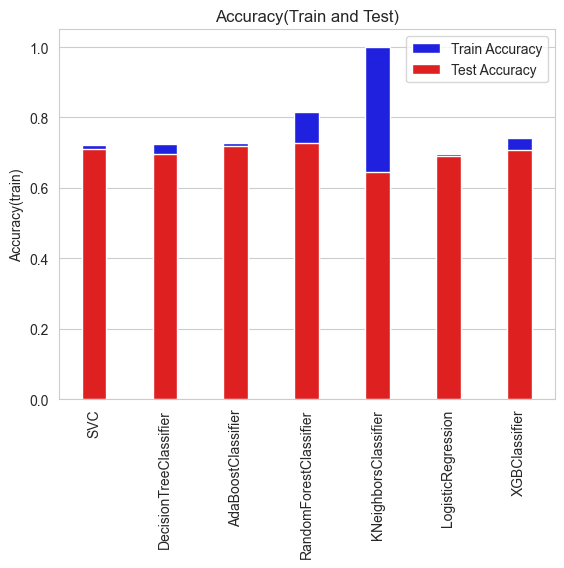

In [148]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have imported 'result_full_features' properly

# Create the figure and axes
fig, ax = plt.subplots()

# Set the width of each bar
bar_width = 0.35

# Create positions for the bars
x = range(len(normalized_accuracy_result['Algorithm']))

# Plot train accuracy
sns.barplot(
    x=x, y='Accuracy(train)', data=normalized_accuracy_result,
    color='blue', label='Train Accuracy', ax=ax, width=bar_width
)

# Plot test accuracy
sns.barplot(
    x=x, y='Accuracy(test)', data=normalized_accuracy_result,
    color='red', label='Test Accuracy', ax=ax, width=bar_width
)

# Set the plot title
ax.set_title('Accuracy(Train and Test)')

# Set x-axis labels and rotate them for better readability
ax.set_xticks(x)
ax.set_xticklabels(normalized_accuracy_result['Algorithm'], rotation=90)

# Show a legend
ax.legend()

# Show the plot
plt.show()


### without normalizing the dataset

**Label encoding on output feature** 

In [149]:
df['DRK_YN'] = encoder.fit_transform(df['DRK_YN'])

In [150]:
df.head()

sex  age  weight  sight_left  sight_right  hear_left   DBP   BLDS  \
0    1   35      75         1.0          1.0        1.0  80.0   99.0   
1    1   30      80         0.9          1.2        1.0  82.0  106.0   
2    1   40      75         1.2          1.5        1.0  70.0   98.0   
3    1   50      80         1.5          1.2        1.0  87.0   95.0   
4    1   50      60         1.0          1.2        1.0  82.0  101.0   

   HDL_chole  LDL_chole  triglyceride  urine_protein  serum_creatinine  \
0       48.0      126.0          92.0            1.0               1.0   
1       55.0      148.0         121.0            1.0               0.9   
2       41.0       74.0         104.0            1.0               0.9   
3       76.0      104.0         106.0            1.0               1.1   
4       61.0      117.0         104.0            1.0               0.8   

   SGOT_AST  SGOT_ALT  gamma_GTP  SMK_stat_type_cd  DRK_YN  
0      21.0      35.0       40.0               1.0       1  
1      20.0      36.0       27.0               3.0       0  
2      47.0      32.0       68.0               1.0       0  
3      29.0      34.0       18.0               1.0       0  
4      19.0      12.0       25.0               1.0       0

In [151]:
df.isnull().sum().sum()

0

In [152]:
df.duplicated().any()

False

In [ ]:
df.info()

In [153]:
X,y = df.iloc[:,:-1],df[['DRK_YN']]

In [154]:
X.shape

(9000, 17)

In [155]:
y.shape

(9000, 1)

**Checklist**
* Missing values ✅
* Duplicate rows ✅
* No object datatype ✅
* Outliers removed ✅
* Then we are good to go😊

### Splitting into X_train,X_test, y_train,y_test

In [ ]:
## Train test split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42)

In [159]:
# Create a list of dataset names
dataset_names = ['X_train', 'X_test', 'y_train', 'y_test']

# Create a list of your datasets
allsets = [X_train, X_test, y_train, y_test]

# Iterate over both the names and datasets
for name, dataset in zip(dataset_names, allsets):
    print(name)
    print('Total rows {} total columns {}'.format(len(dataset), len(dataset.columns)))
    print('Shape {}'.format(dataset.shape))
    print('Dimension {}'.format(dataset.ndim))


X_train
Total rows 6750 total columns 17
Shape (6750, 17)
Dimension 2
X_test
Total rows 2250 total columns 17
Shape (2250, 17)
Dimension 2
y_train
Total rows 6750 total columns 1
Shape (6750, 1)
Dimension 2
y_test
Total rows 2250 total columns 1
Shape (2250, 1)
Dimension 2


In [160]:
# instantiating the models
def model_implementation_without_normalized_dataset(X_train,X_test,y_train,y_test):
    svc = SVC()
    dtc = DecisionTreeClassifier()
    ada_boost = AdaBoostClassifier()
    rfclf = RandomForestClassifier()
    Knn = KNeighborsClassifier()
    lr = LogisticRegression()
    xgb = XGBClassifier()

    classifiers = {
        'SVC': svc,
        'DecisionTreeClassifier': dtc,
        'AdaBoostClassifier': ada_boost,
        'RandomForestClassifier': rfclf,
        'KNeighborsClassifier': Knn,
        'LogisticRegression': lr,
        'XGBClassifier' : xgb
    }
    accuracy_score_train = []
    accuracy_score_test = []
    algorithms = []
    mse_train = []
    mse_test = []

    for obj, algos in classifiers.items():
        algorithms.append(obj)
        algos.fit(X_train,y_train)
        train_pred = algos.predict(X_train)
        test_pred = algos.predict(X_test)
        accuracy_score_train.append(accuracy_score(y_train,train_pred))
        accuracy_score_test.append(accuracy_score(y_test,test_pred))
        mse_train.append(mean_squared_error(y_train,train_pred))
        mse_test.append(mean_squared_error(y_test, test_pred))
    result_full_features = pd.DataFrame(
        {
            'Algorithm' : algorithms,
            'Accuracy(train)' : accuracy_score_train,
            'Accuracy(test)' : accuracy_score_test,
            'MSE(train)' : mse_train,
            'MSE(test)': mse_test
        }
    )
    return result_full_features

In [161]:
result = model_implementation_without_normalized_dataset(X_train,X_test,y_train,y_test)

In [162]:
result

Algorithm  Accuracy(train)  Accuracy(test)  MSE(train)  \
0                     SVC         0.709185        0.708444    0.290815   
1  DecisionTreeClassifier         1.000000        0.645778    0.000000   
2      AdaBoostClassifier         0.743407        0.723111    0.256593   
3  RandomForestClassifier         1.000000        0.720000    0.000000   
4    KNeighborsClassifier         0.761926        0.644444    0.238074   
5      LogisticRegression         0.697778        0.692000    0.302222   
6           XGBClassifier         0.982519        0.712000    0.017481   

   MSE(test)  
0   0.291556  
1   0.354222  
2   0.276889  
3   0.280000  
4   0.355556  
5   0.308000  
6   0.288000

**Conclusion**
* AdaBoostClassifier is giving the best model among all the others model
* Even LogisticRegression has shown its consistency in both train and in test score same with SV
* **Further move**
* Will go forward with AdaBoostClassifer and again see the accuracy after Hypertuning on this model

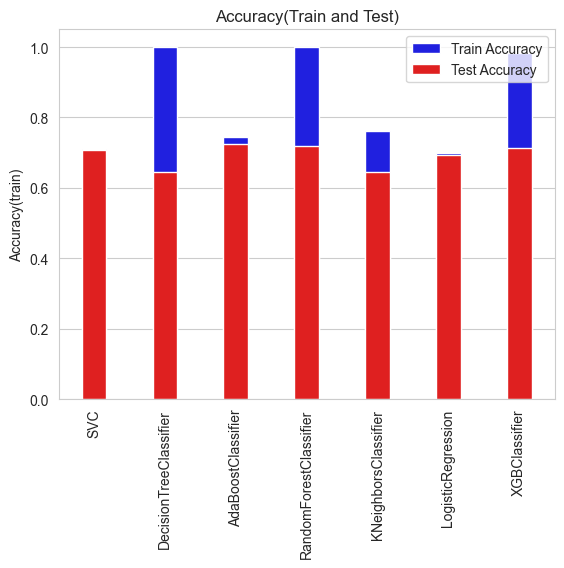

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the figure and axes
fig, ax = plt.subplots()

# Set the width of each bar
bar_width = 0.35

# Create positions for the bars
x = range(len(result['Algorithm']))

# Plot train accuracy
sns.barplot(
    x=x, y='Accuracy(train)', data=result,
    color='blue', label='Train Accuracy', ax=ax, width=bar_width
)

# Plot test accuracy
sns.barplot(
    x=x, y='Accuracy(test)', data=result,
    color='red', label='Test Accuracy', ax=ax, width=bar_width
)

# Set the plot title
ax.set_title('Accuracy(Train and Test)')

# Set x-axis labels and rotate them for better readability
ax.set_xticks(x)
ax.set_xticklabels(result['Algorithm'], rotation=90)

# Show a legend
ax.legend()

# Show the plot
plt.show()


### Hypertuning on AdaBoostClassifier

In [165]:
parameters  = {
    'n_estimators' : [50,70,80,100,120],
    'learning_rate' : [0.7 ,0.9, 1.0 ,1.15, 1.3],
    'algorithm' : ['SAMME','SAMME.R']
}

In [166]:
def hypertuned_ada(X_train,X_test,y_train,y_test):
    ada = AdaBoostClassifier()
    params = parameters
    clf = GridSearchCV(ada,params,cv=5,verbose=3,scoring='accuracy')
    clf.fit(X_train,y_train)
    ada = AdaBoostClassifier(**clf.best_params_)
    ada.fit(X_train,y_train)
    return ada

In [169]:
ada = hypertuned_ada(X_train,X_test,y_train,y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=50;, score=0.736 total time=   1.9s
[CV 2/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=50;, score=0.728 total time=   2.0s
[CV 3/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=50;, score=0.725 total time=   1.6s
[CV 4/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=50;, score=0.712 total time=   1.6s
[CV 5/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=50;, score=0.727 total time=   1.6s
[CV 1/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=70;, score=0.732 total time=   2.3s
[CV 2/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=70;, score=0.726 total time=   2.3s
[CV 3/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=70;, score=0.721 total time=   2.3s
[CV 4/5] END algorithm=SAMME, learning_rate=0.7, n_estimators=70;, score=0.711 total time=   2.4s
[CV 5/5] END algorithm=SAMME, learning_rate=0.7, n_estim

In [170]:
ada.get_params()

{'algorithm': 'SAMME',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.15,
 'n_estimators': 100,
 'random_state': None}

In [171]:
def ADA_accuracy():
    accuracy_score_train = []
    accuracy_score_test = []
    mse_train = []
    mse_test= []
    algos = ada
    train_pred = algos.predict(X_train)
    test_pred = algos.predict(X_test)
    accuracy_score_train.append(accuracy_score(y_train,train_pred))
    accuracy_score_test.append(accuracy_score(y_test,test_pred))
    mse_train.append(mean_squared_error(y_train,train_pred))
    mse_test.append(mean_squared_error(y_test, test_pred))
    result_full_features = pd.DataFrame(
        {
            'Algorithm' : 'AdaBoostClassifier',
            'Accuracy(train)' : accuracy_score_train,
            'Accuracy(test)' : accuracy_score_test,
            'MSE(train)' : mse_train,
            'MSE(test)': mse_test
        }
    )
    return result_full_features

In [172]:
ada_result = ADA_accuracy()
ada_result

Algorithm  Accuracy(train)  Accuracy(test)  MSE(train)  MSE(test)
0  AdaBoostClassifier         0.740444        0.715556    0.259556   0.284444

**Conclusion**
* AdaBoost Classifier gives good accuracy among all, 0.74 - training, 0.71 in testing

# Thank you---------------------------------